In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import random 
import time 

$H_0: p = p_0$ 

$H_1: p > p_0$

### binom 

In [2]:
α = 0.05 

In [3]:
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
sample_sizes 

array([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
       2000])

In [4]:
p0s = np.arange(0.01, 0.21, 0.01)
p0s 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [5]:
st = time.time() 

errors_total_binom = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (10000, n)) 
        ys = samples.sum(axis = 1) 
    
        decisions = [None] * 10000 
    
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 1 
            else: 
                decisions[i] = 0 
    
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total_binom += errors_per_n

print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 785.7236158847809 seconds


In [6]:
a1 = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a1 += [list(p0s)[i]] * len(sample_sizes)
    
b1 = list(pd.Series(a1).round(2)) 

d1 = {"p0": b1, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total_binom}
df1 = pd.DataFrame(d1) 

df11 = df1
df11["p0"] = df11["p0"].astype(str) 

df111 = df11.pivot_table(values = "type_I_error", index = "n", columns = "p0") 

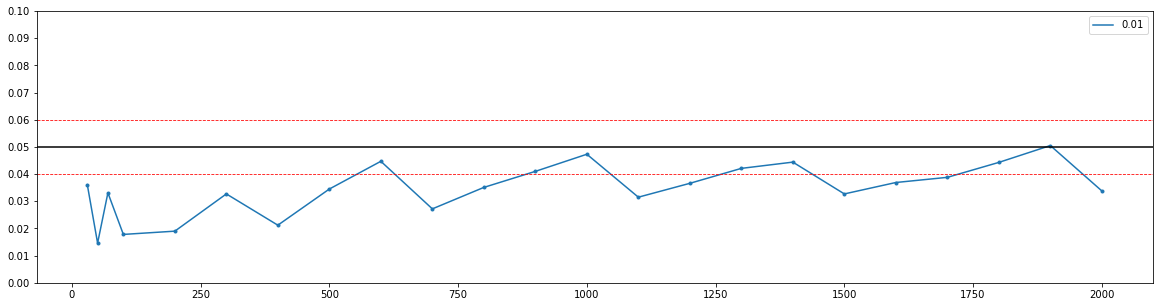

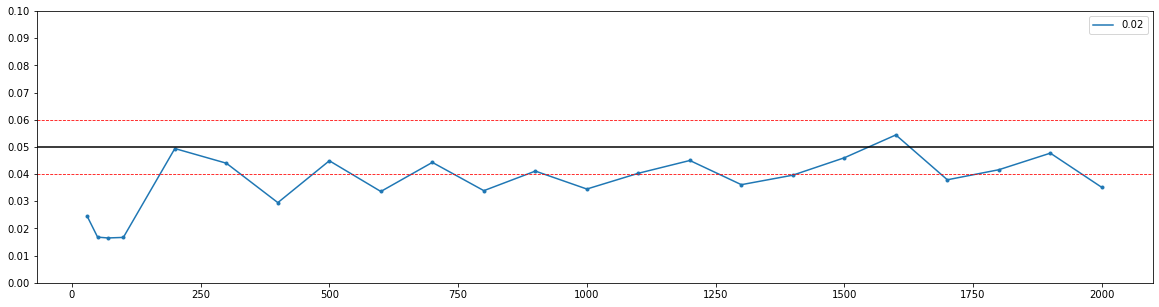

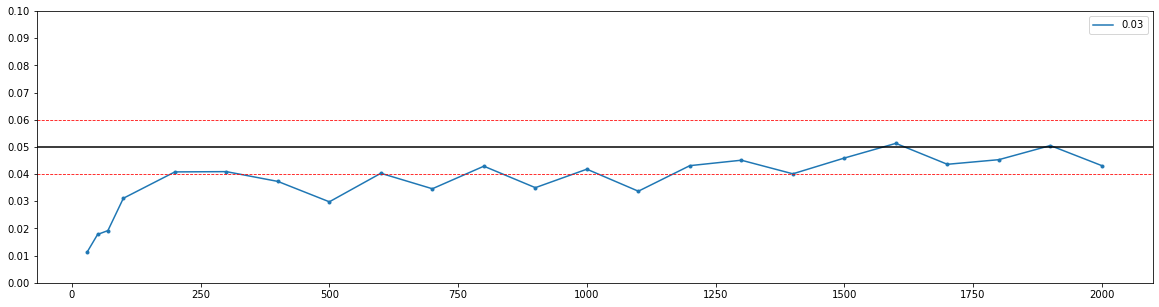

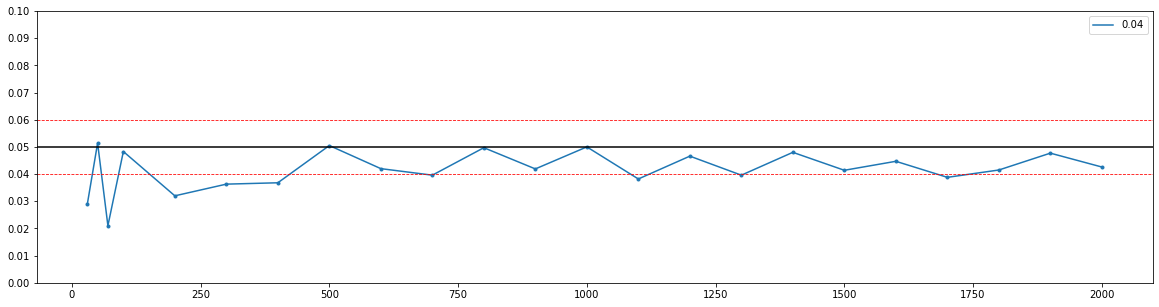

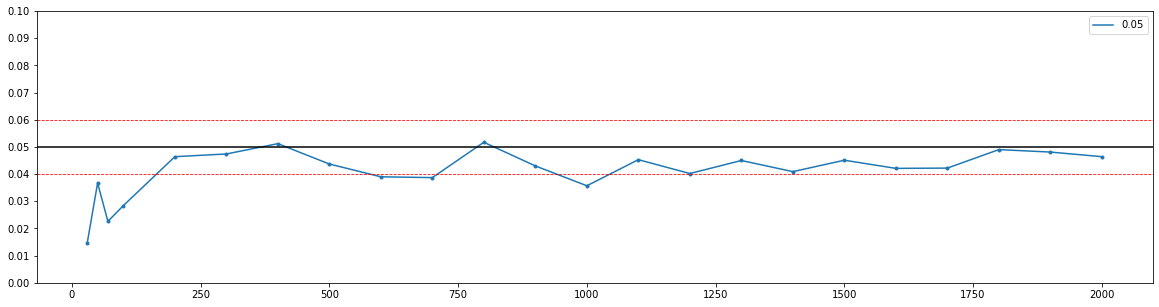

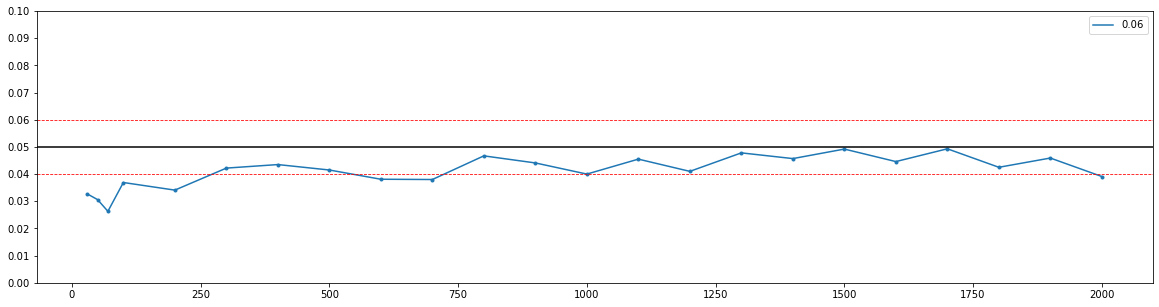

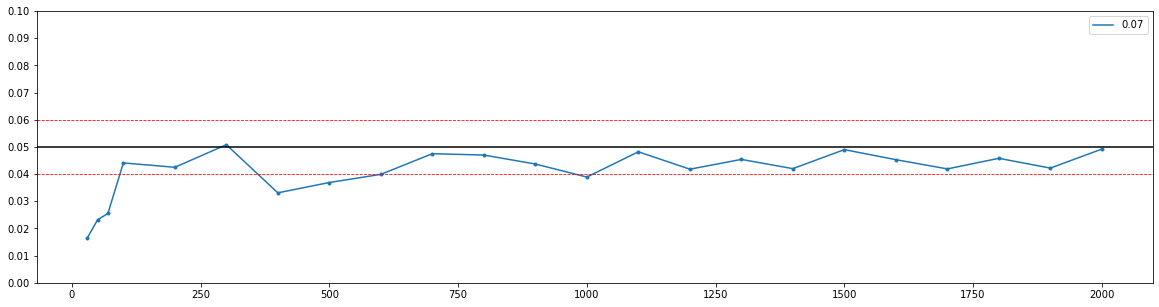

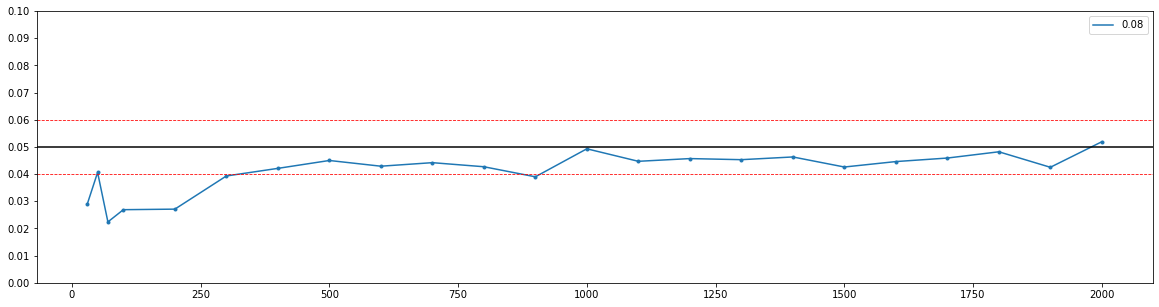

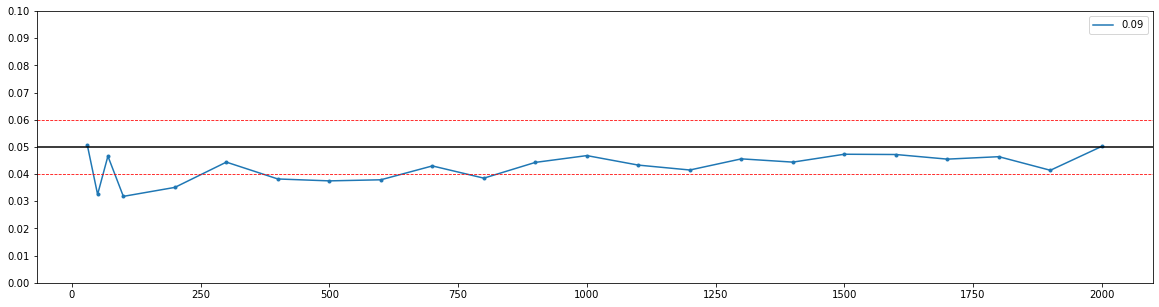

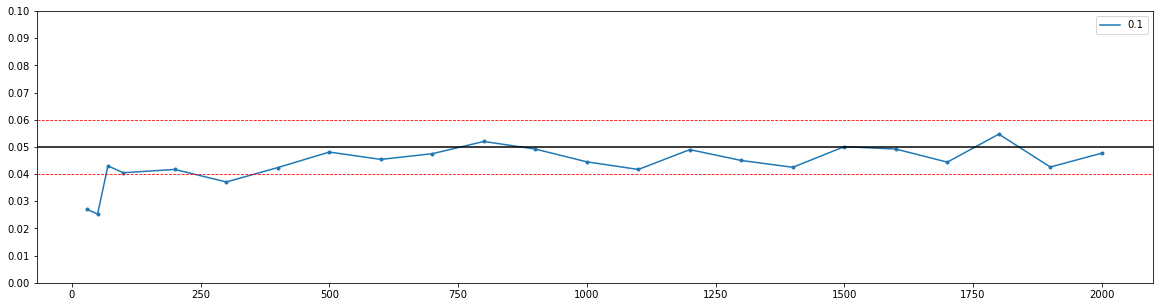

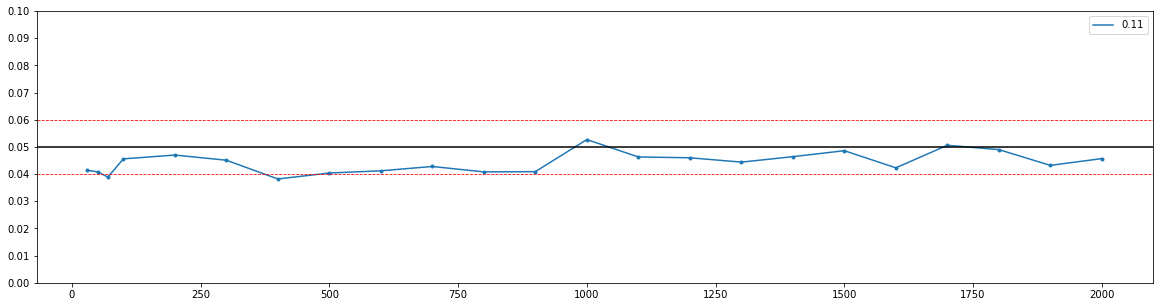

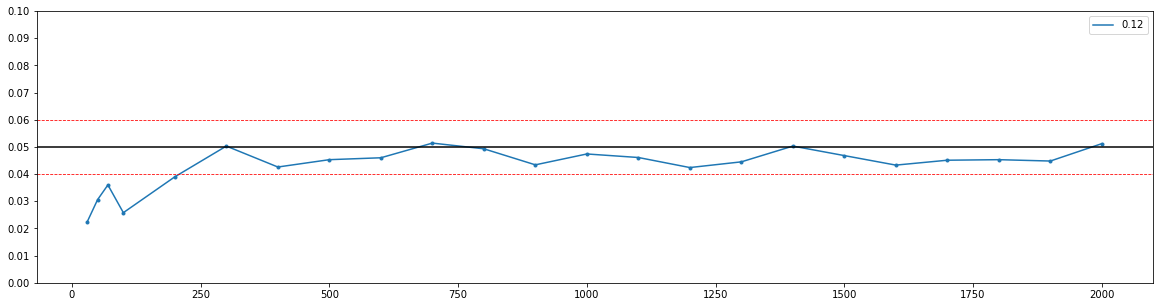

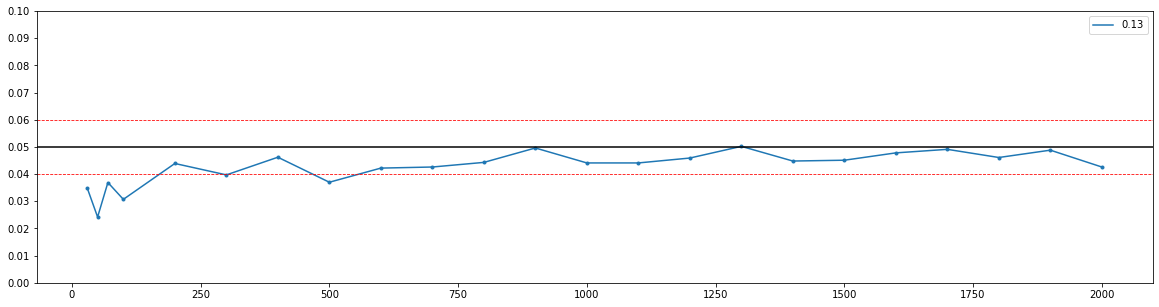

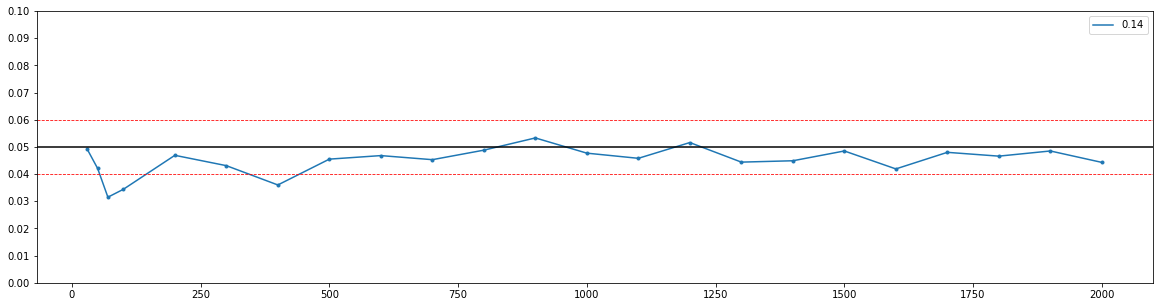

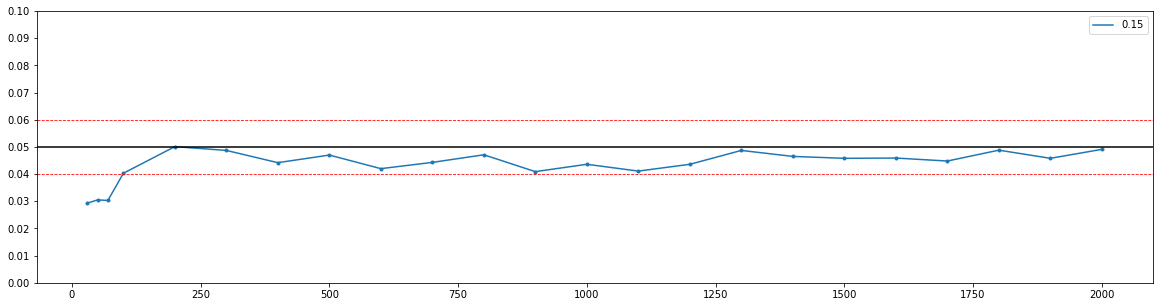

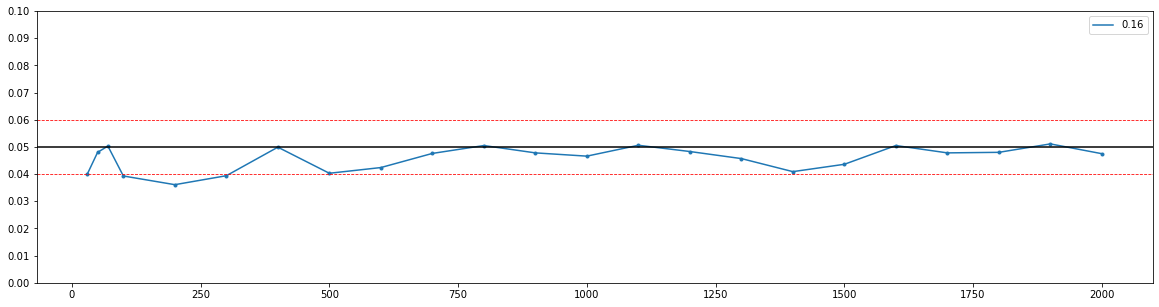

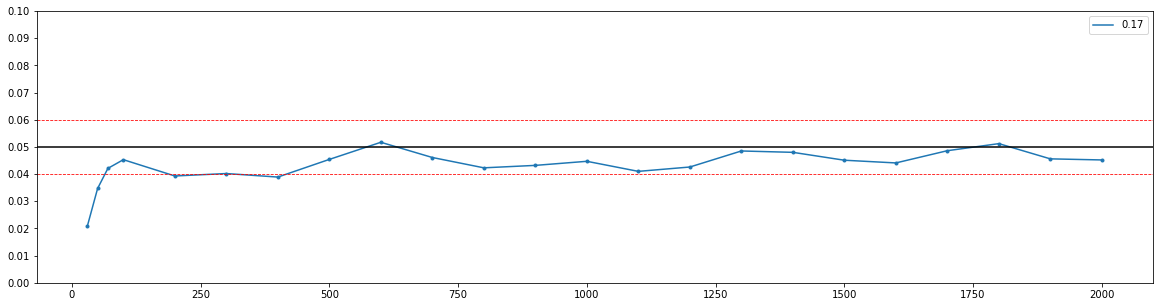

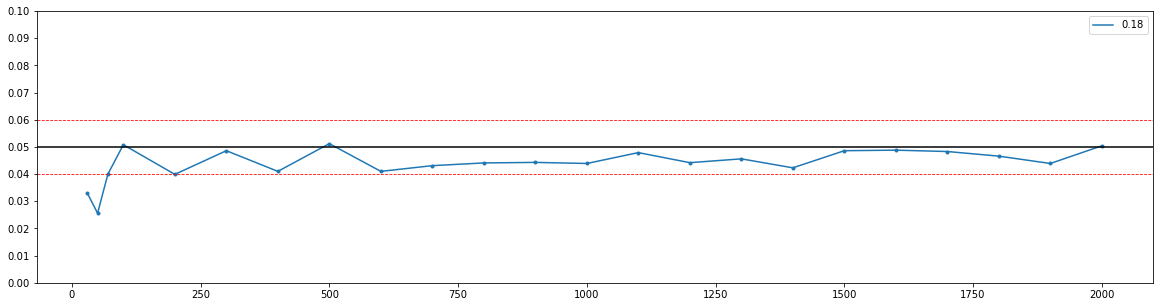

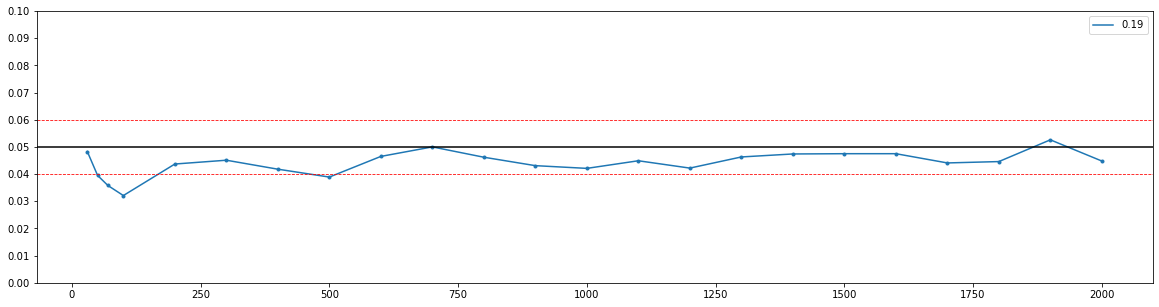

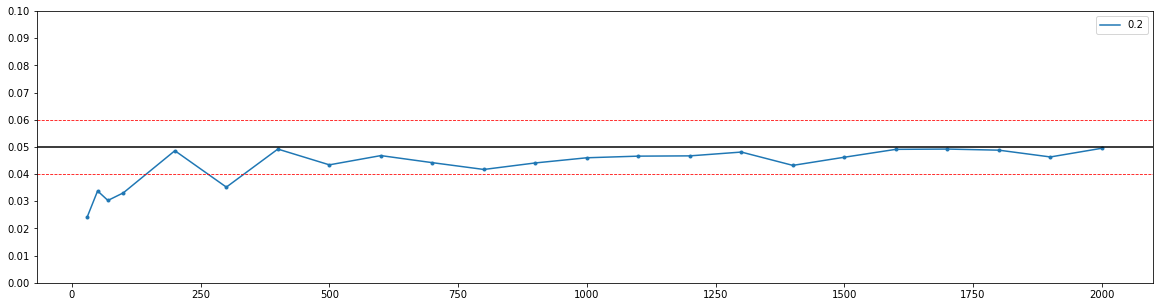

In [7]:
for c in df111.columns: 
    plt.figure(figsize = (20, 5))
    plt.scatter(x = df111[c].index, y = df111[c], marker = ".")
    plt.plot(df111[c].index, df111[c], "-", label = c) 
    plt.axhline(α, color = "black") 
    plt.axhline(α + 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.axhline(α - 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.yticks(list(np.arange(0, .11, .01)))
    plt.legend()
    plt.show() 

### norm 

In [8]:
α = 0.05 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [9]:
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
sample_sizes 

array([  30,   50,   70,  100,  200,  300,  400,  500,  600,  700,  800,
        900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
       2000])

In [10]:
p0s = np.arange(0.01, 0.21, 0.01)
p0s 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [11]:
st = time.time()

errors_total_norm = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (10000, n)) 
        proportion_estimates = samples.sum(axis=1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n) 
        decisions = (z_values >= z_α).astype(int) 
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total_norm += errors_per_n

print()
et = time.time()
elapsed_time = et - st 
print('Execution time:', elapsed_time, 'seconds')


Execution time: 116.44479775428772 seconds


In [12]:
a2 = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a2 += [list(p0s)[i]] * len(sample_sizes)

b2 = list(pd.Series(a2).round(2)) 

d2 = {"p0": b2, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total_norm}
df2 = pd.DataFrame(d2)

df22 = df2
df22["p0"] = df22["p0"].astype(str)

df222 = df22.pivot_table(values = "type_I_error", index = "n", columns = "p0") 

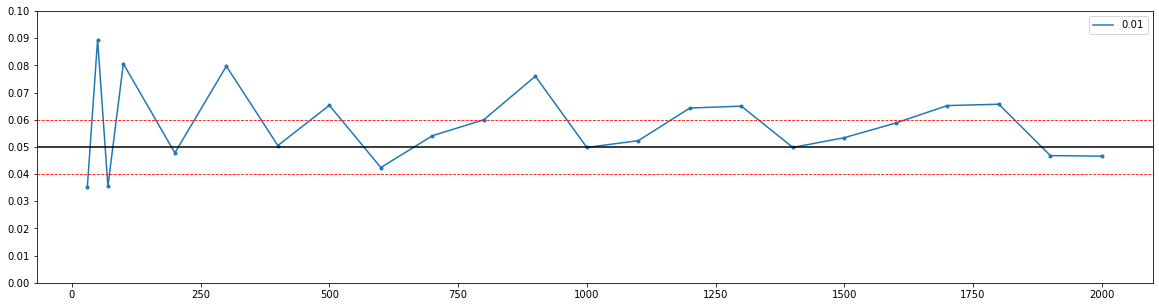

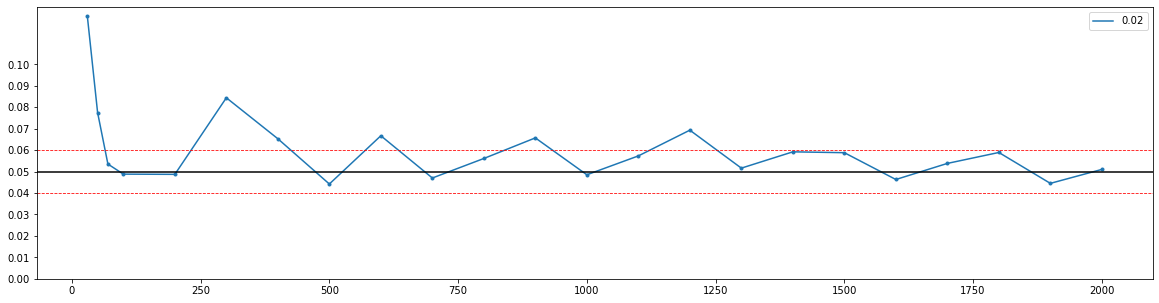

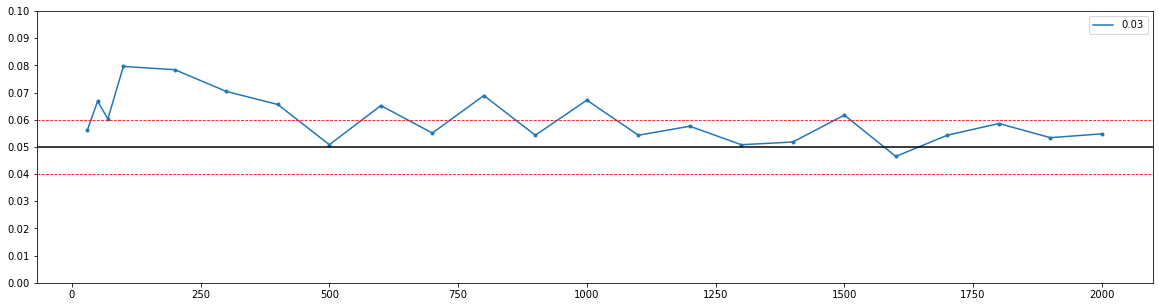

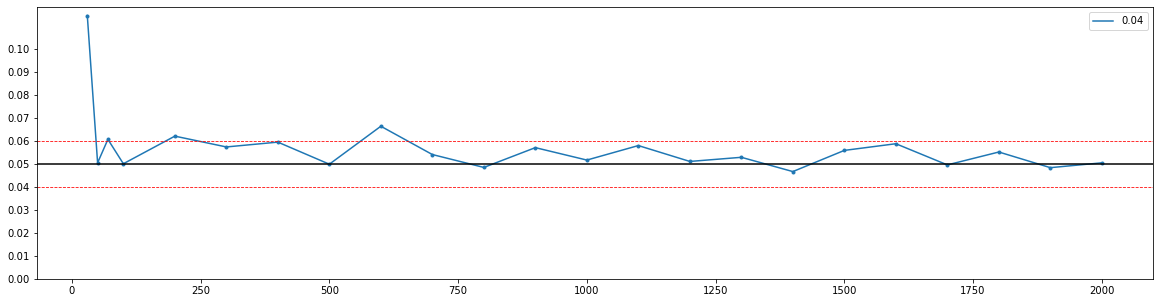

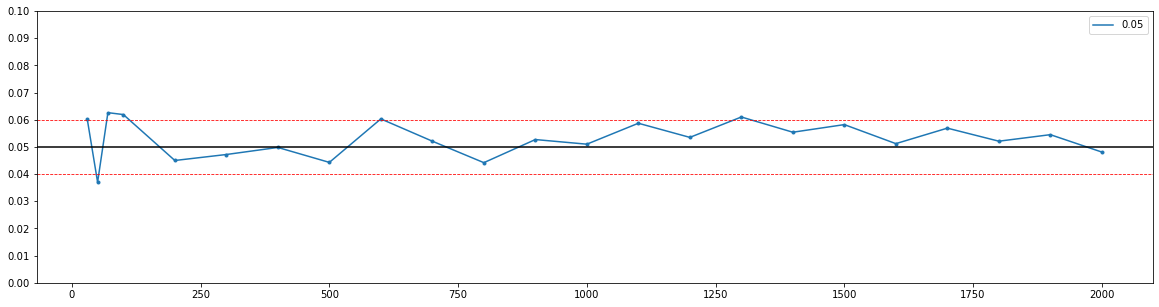

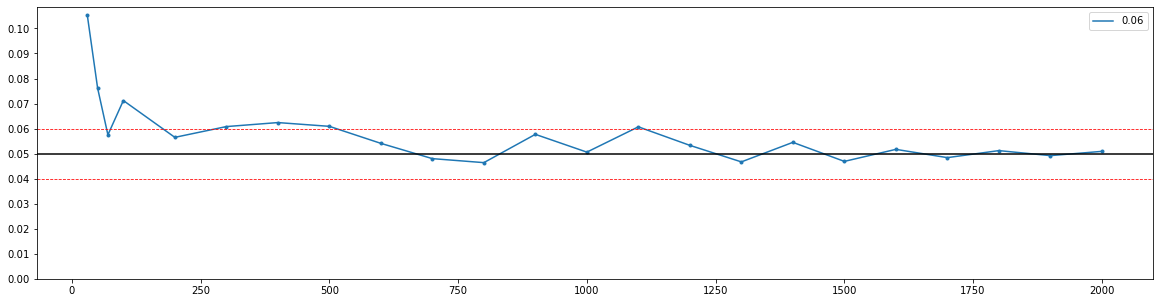

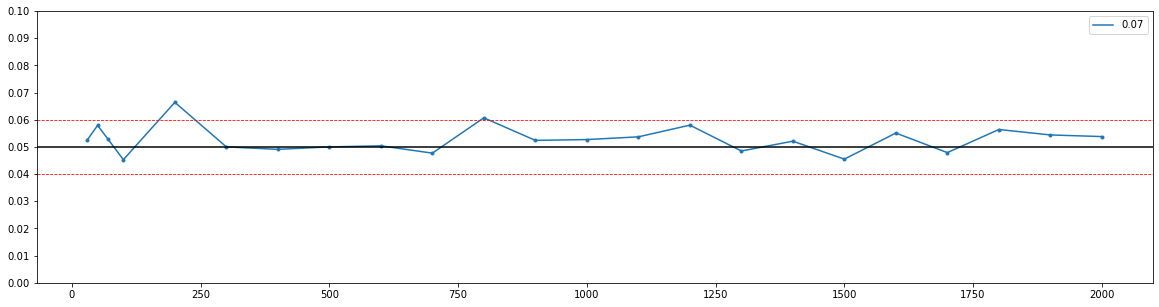

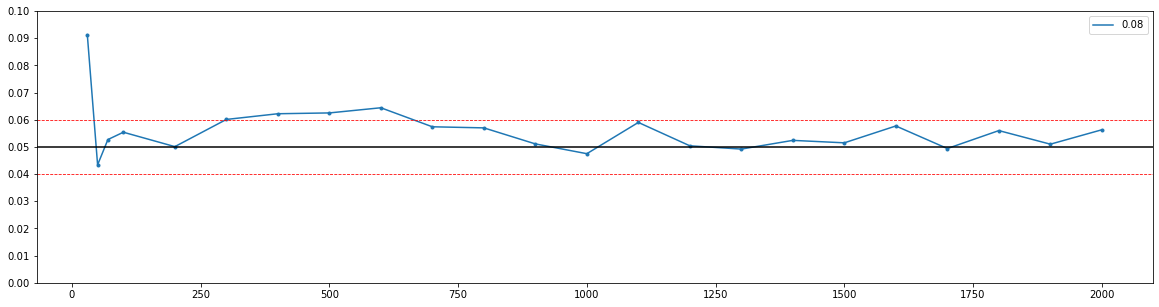

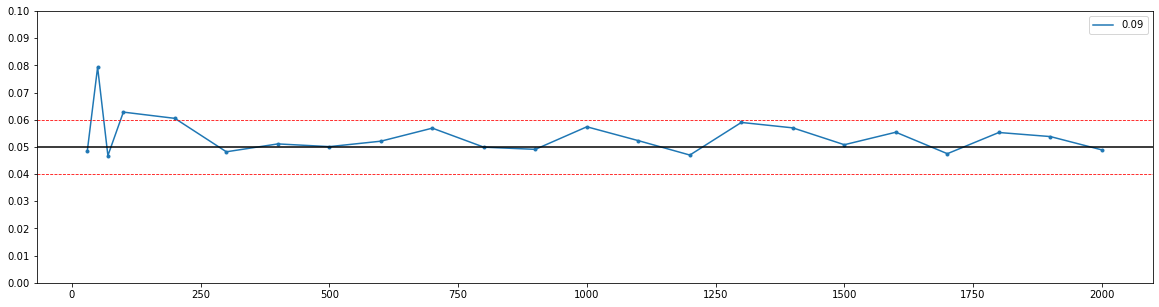

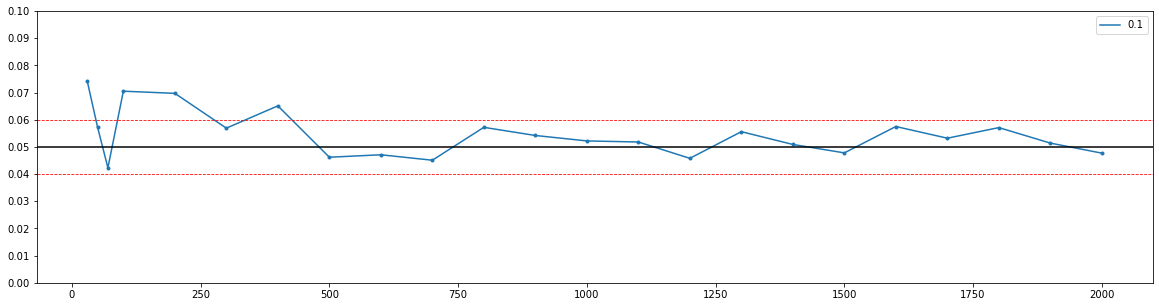

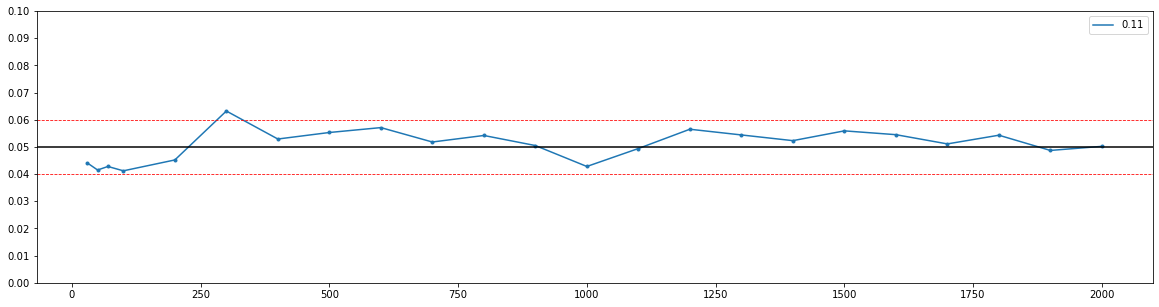

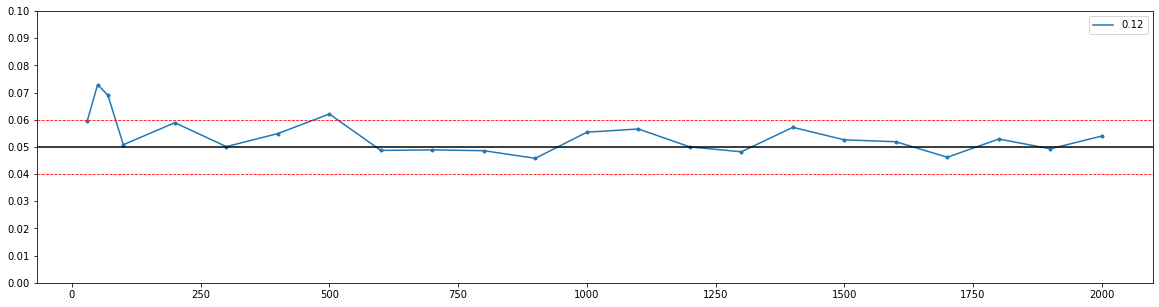

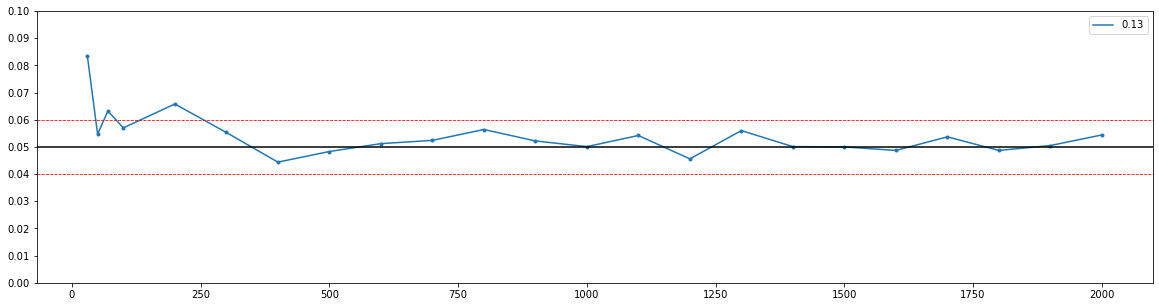

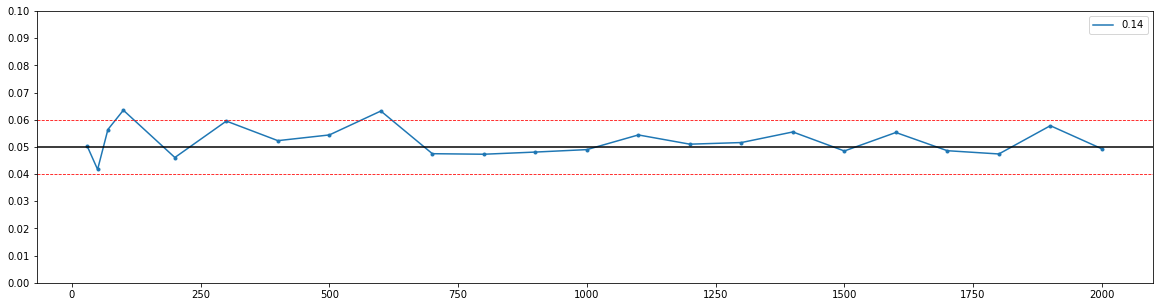

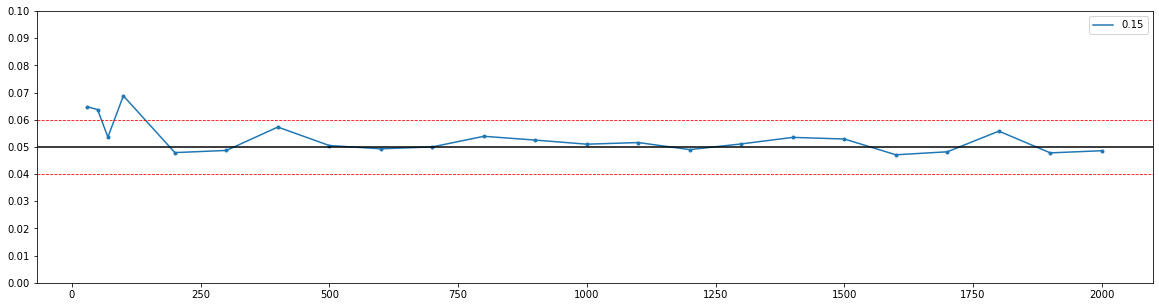

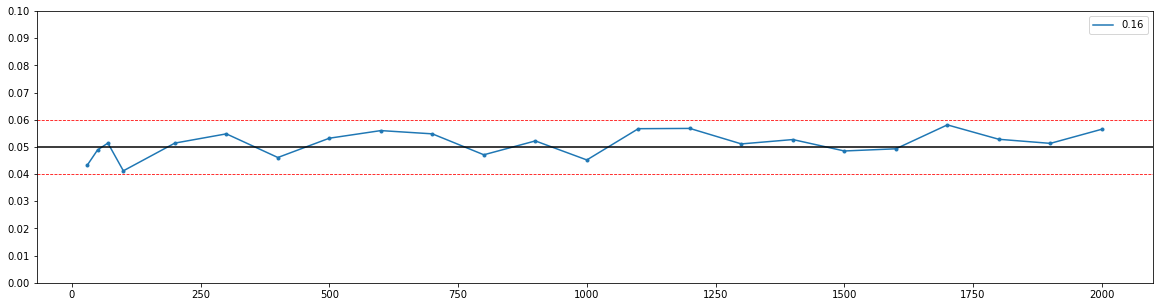

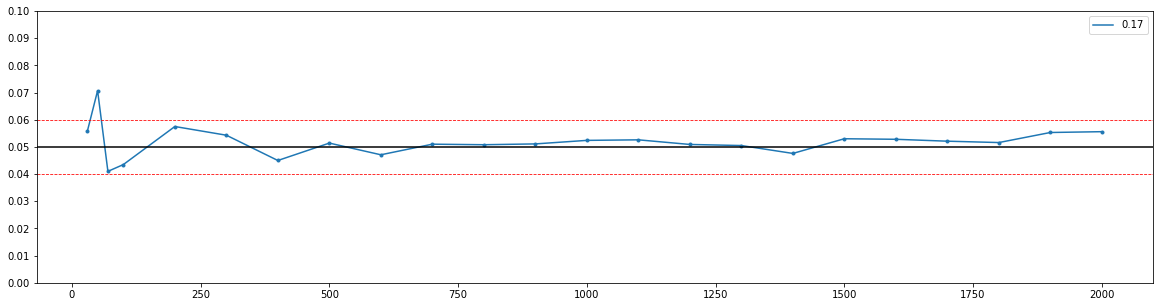

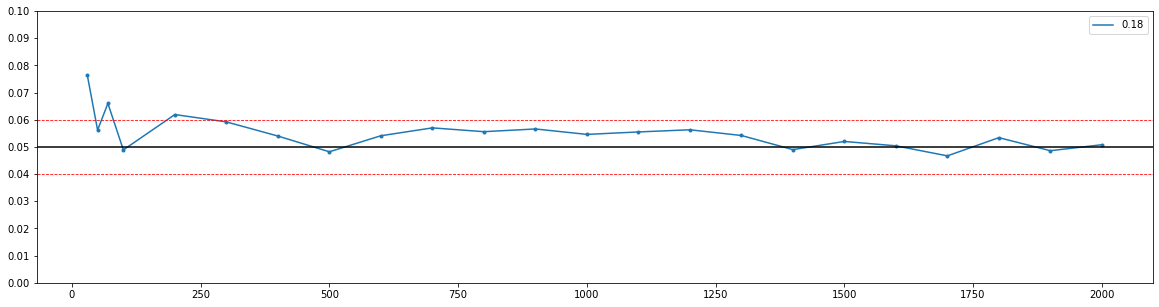

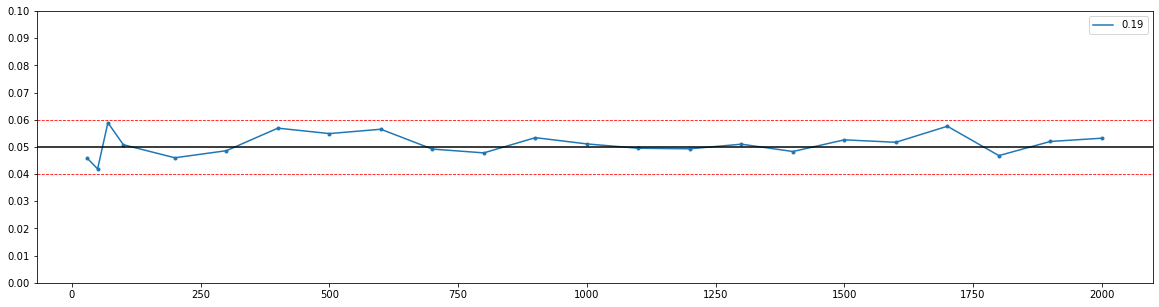

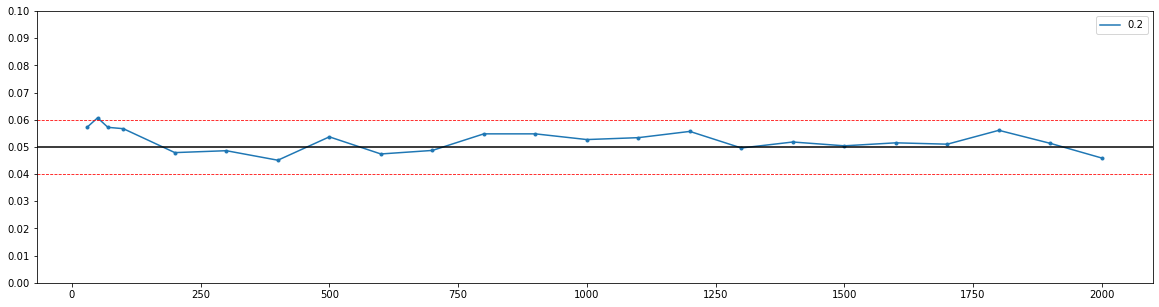

In [13]:
for c in df222.columns: 
    plt.figure(figsize = (20, 5))
    plt.scatter(x = df222[c].index, y = df222[c], marker = ".")
    plt.plot(df222[c].index, df222[c], "-", label = c) 
    plt.axhline(α, color = "black") 
    plt.axhline(α + 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.axhline(α - 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.yticks(list(np.arange(0, .11, .01)))
    plt.legend() 
    plt.show() 

### arcsin 

In [15]:
α = 0.05 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array( [30, 50, 70] + list( np.arange(100, 2100, 100) ) )
print(sample_sizes)
p0s = np.arange(0.01, 0.21, 0.01)
print(p0s) 

1.6448536269514722
[  30   50   70  100  200  300  400  500  600  700  800  900 1000 1100
 1200 1300 1400 1500 1600 1700 1800 1900 2000]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2 ]


In [16]:
st = time.time()

errors_total_arcsin = []

for p0 in p0s: 

    errors_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 

        samples = np.random.binomial(1, p0, (10000, n))  
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values >= z_α).astype(int) 
        type_I_error_sim = np.mean(decisions) 
        
        errors_per_n[k] = type_I_error_sim
    
    errors_total_arcsin += errors_per_n

print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 116.96577382087708 seconds


In [17]:
a3 = [p0s[0]] * len(sample_sizes)

for i in range(1, len(p0s)): 
    a3 += [list(p0s)[i]] * len(sample_sizes)

b3 = list(pd.Series(a3).round(2)) 

d3 = {"p0": b3, "n": list(sample_sizes) * len(p0s), "type_I_error": errors_total_arcsin}
df3 = pd.DataFrame(d3)

df33 = df3
df33["p0"] = df33["p0"].astype(str)

df333 = df33.pivot_table(values = "type_I_error", index = "n", columns = "p0") 

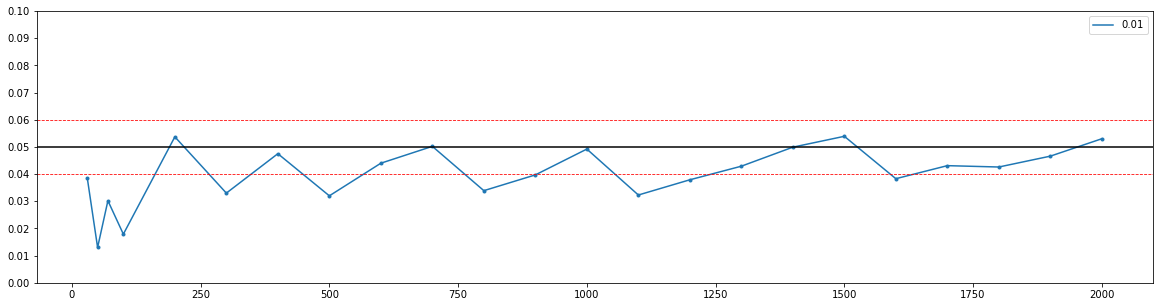

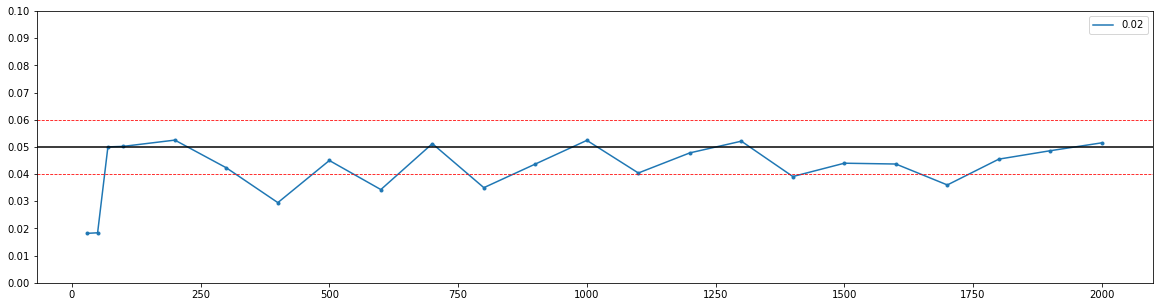

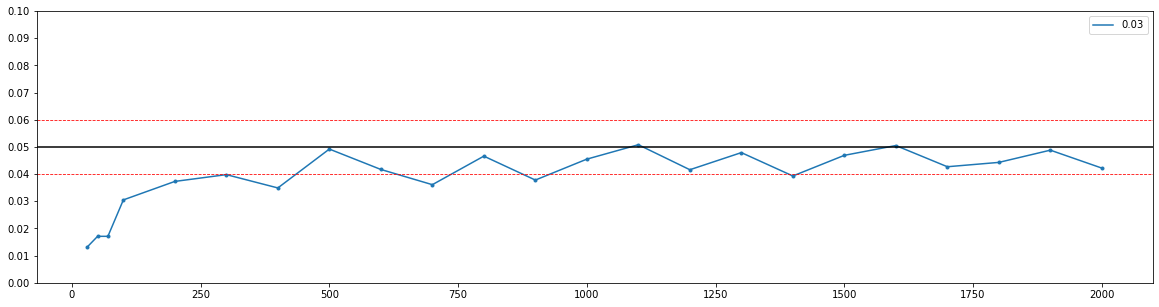

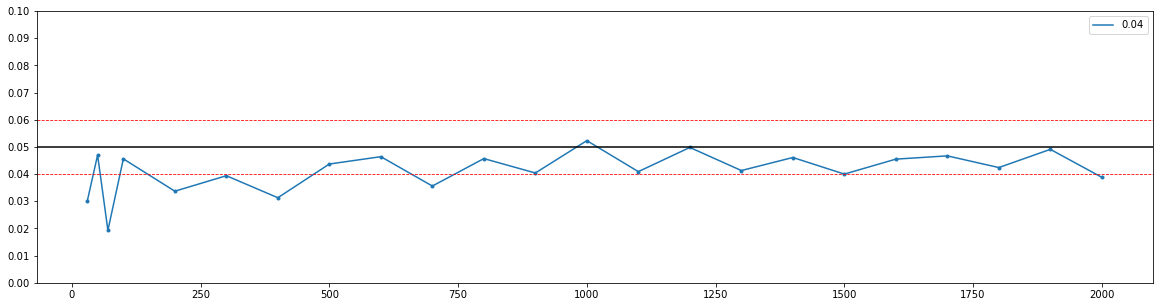

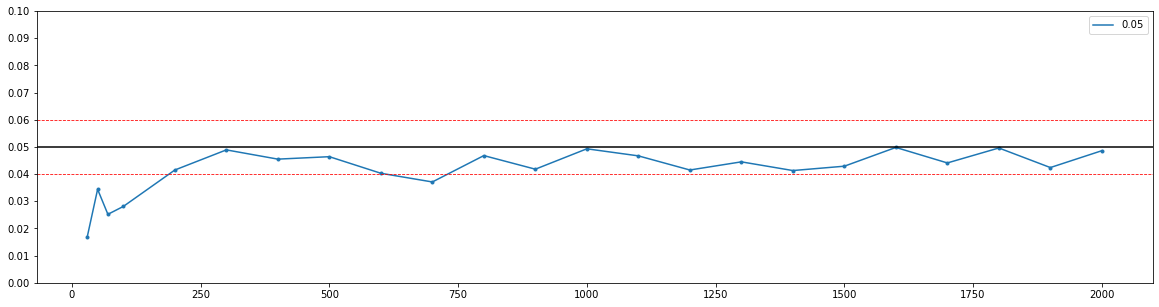

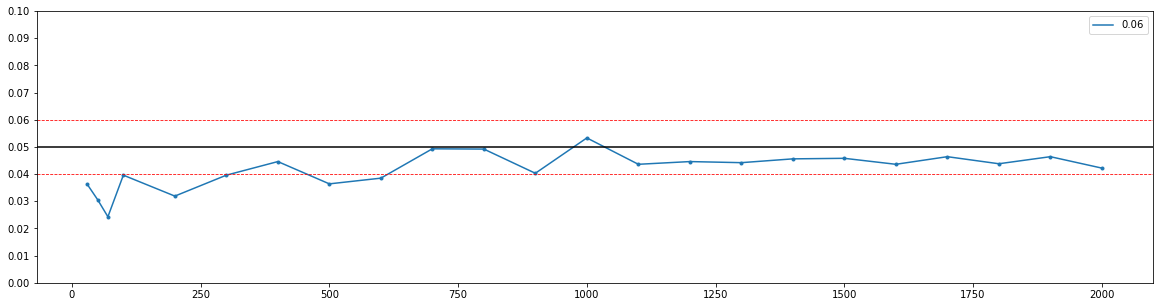

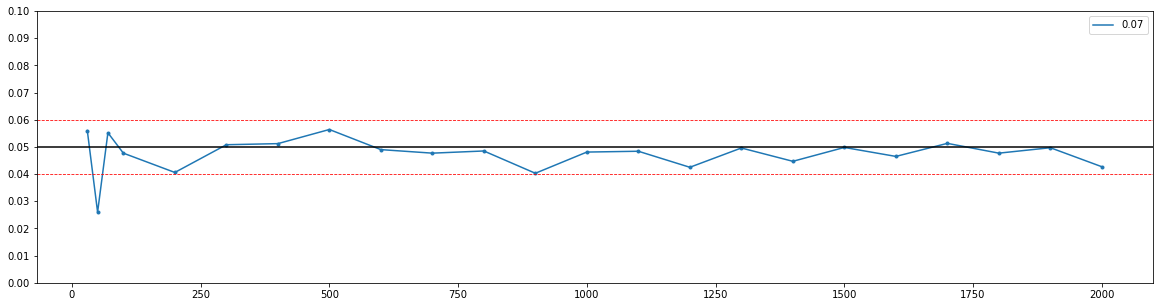

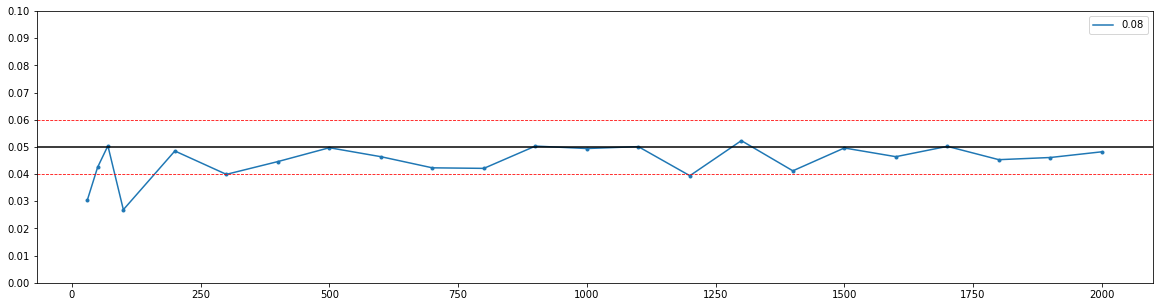

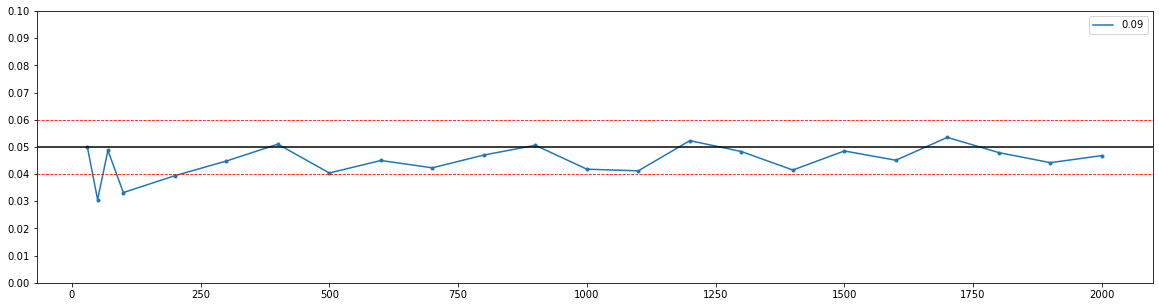

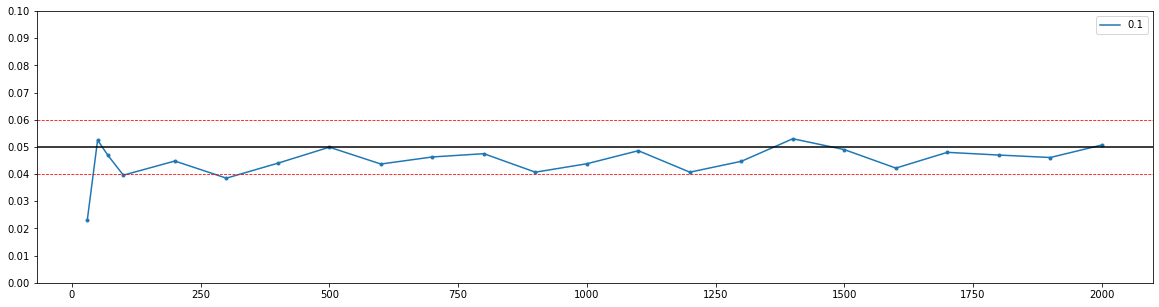

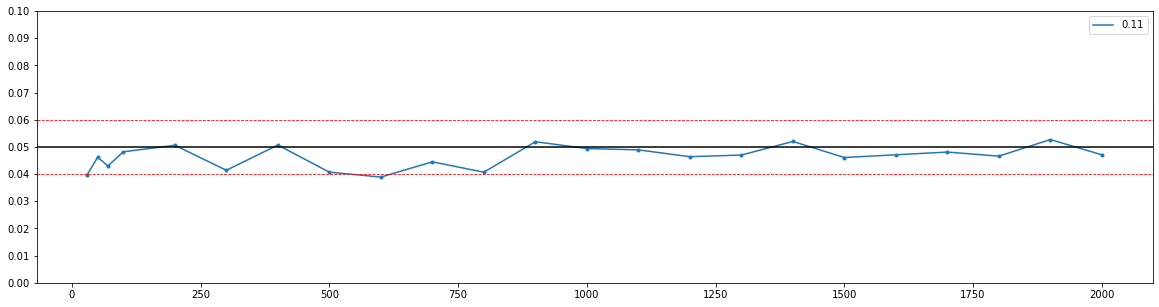

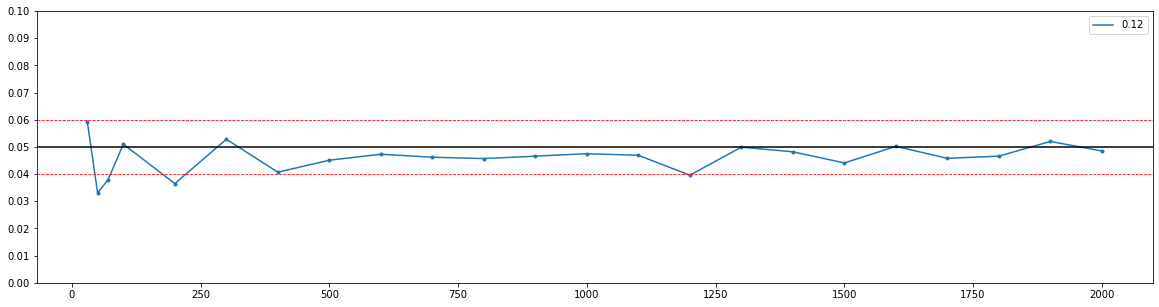

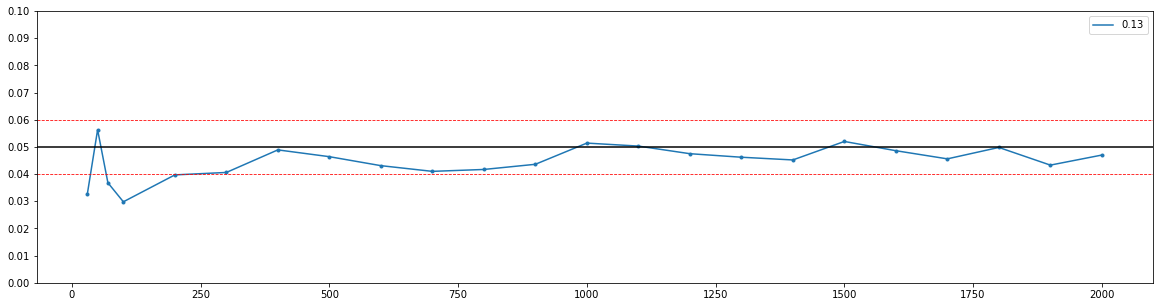

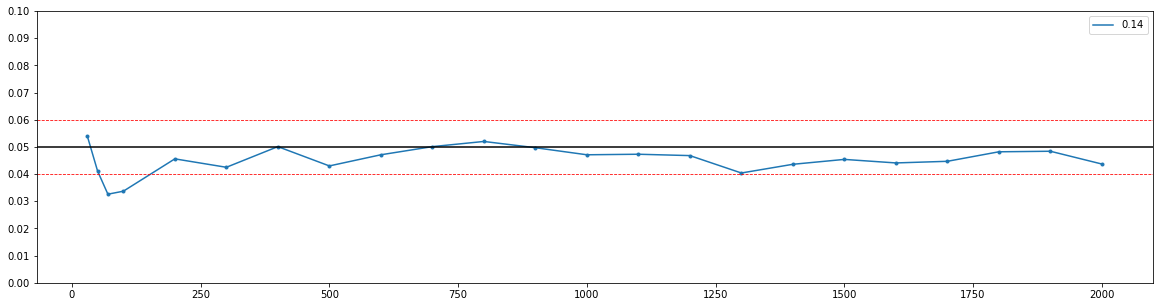

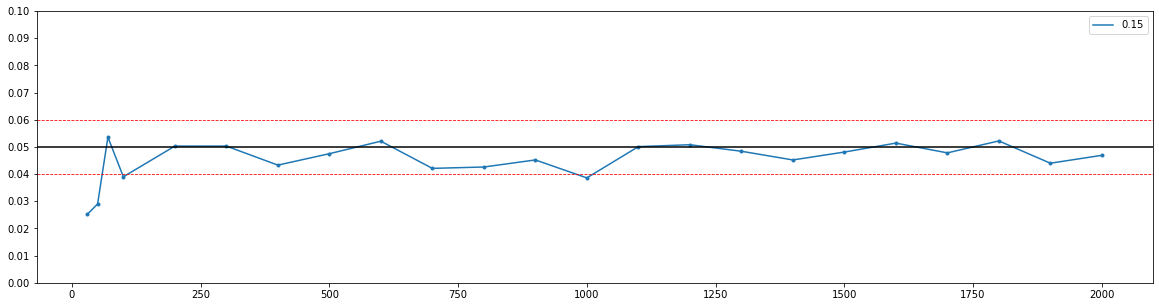

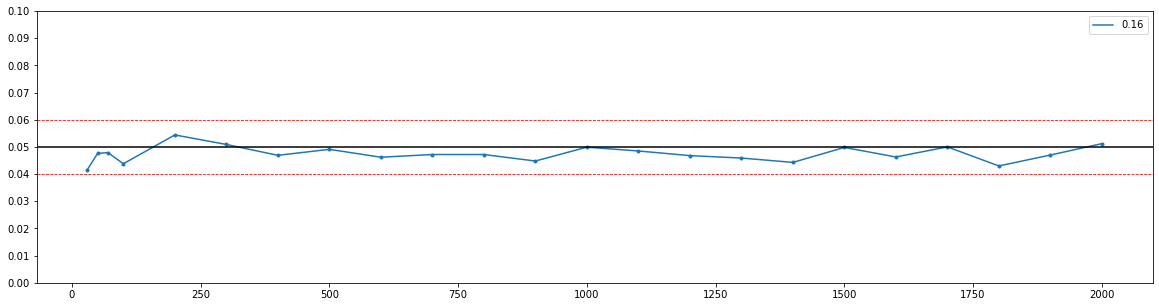

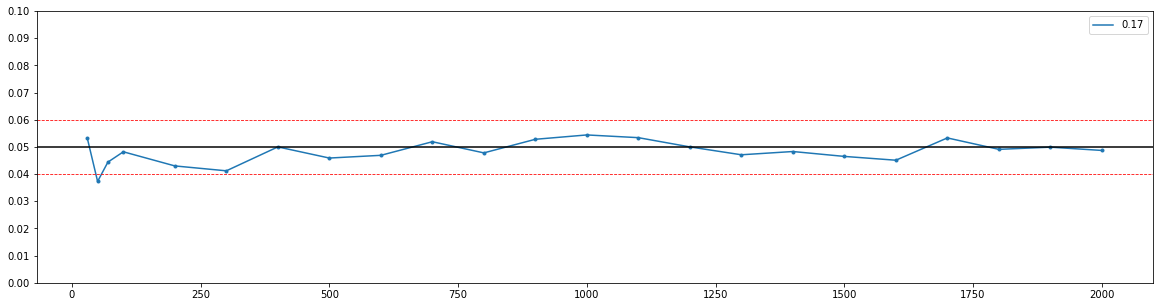

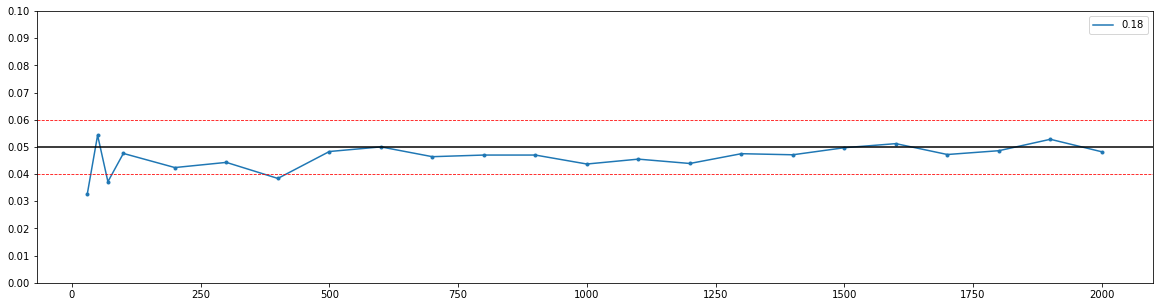

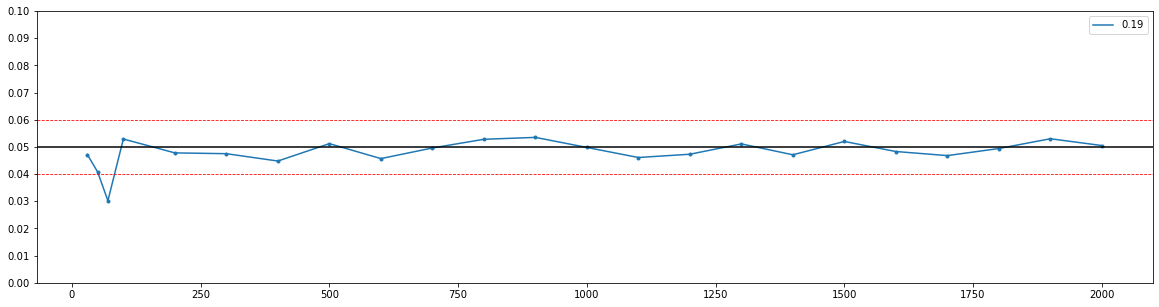

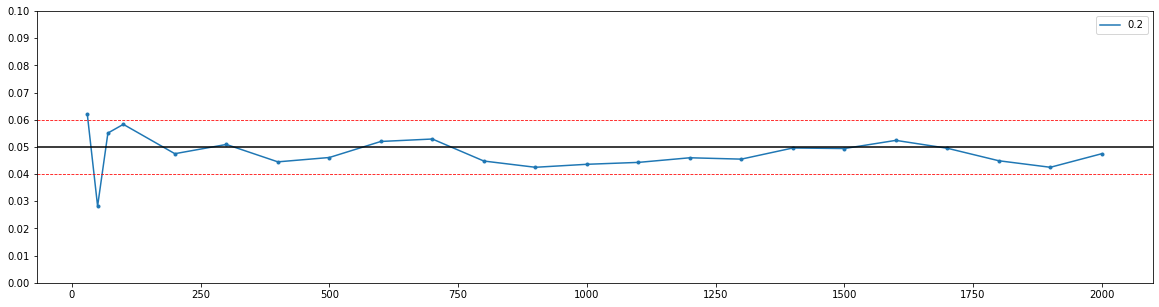

In [18]:
for c in df333.columns: 
    plt.figure(figsize = (20, 5))
    plt.scatter(x = df333[c].index, y = df333[c], marker = ".")
    plt.plot(df333[c].index, df333[c], "-", label = c) 
    plt.axhline(α, color = "black") 
    plt.axhline(α + 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.axhline(α - 0.01, color = "red", linestyle = "--", linewidth = 0.8) 
    plt.yticks(list(np.arange(0, .11, .01)))
    plt.legend() 
    plt.show()

### norm vs binom 

In [19]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

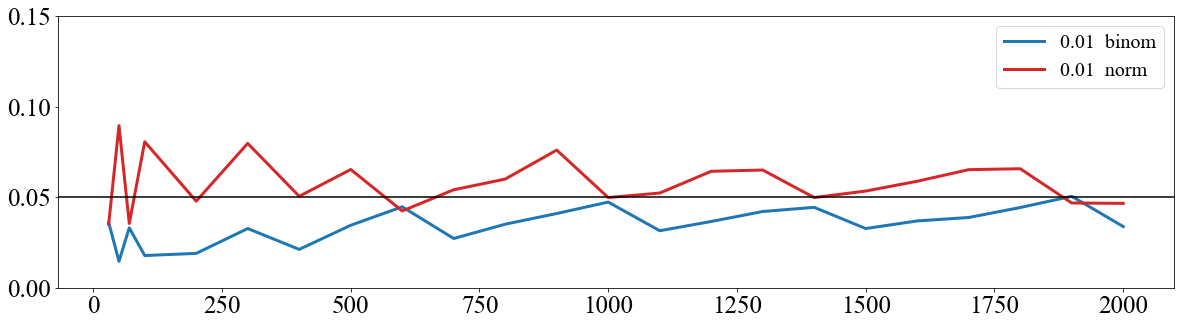

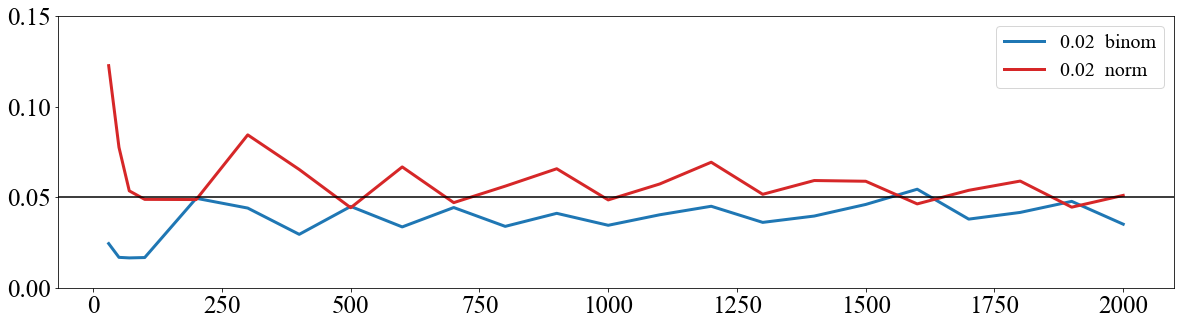

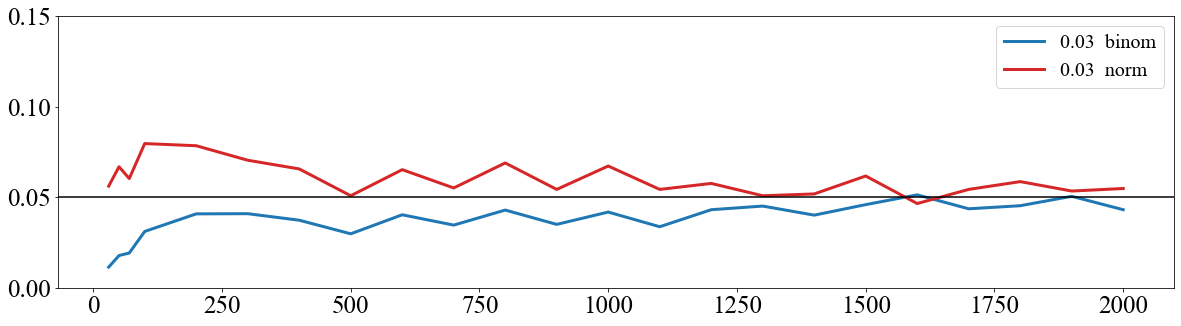

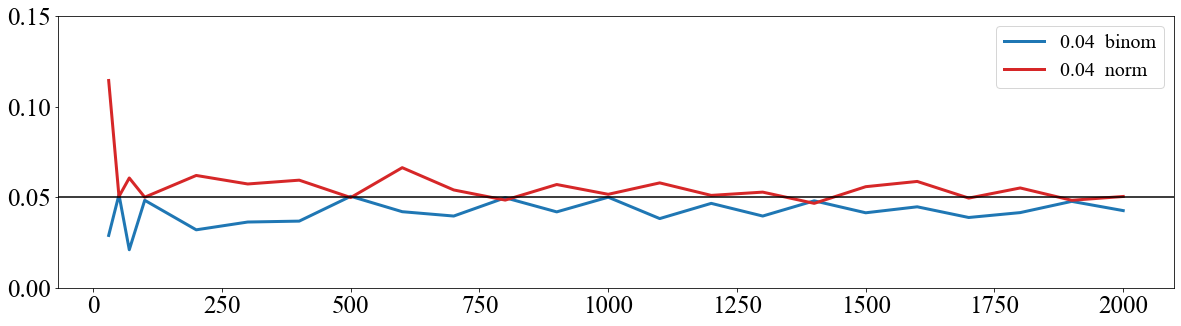

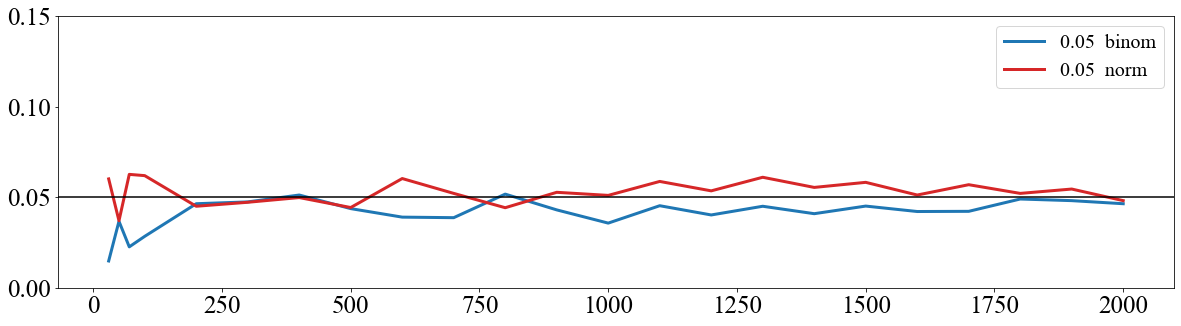

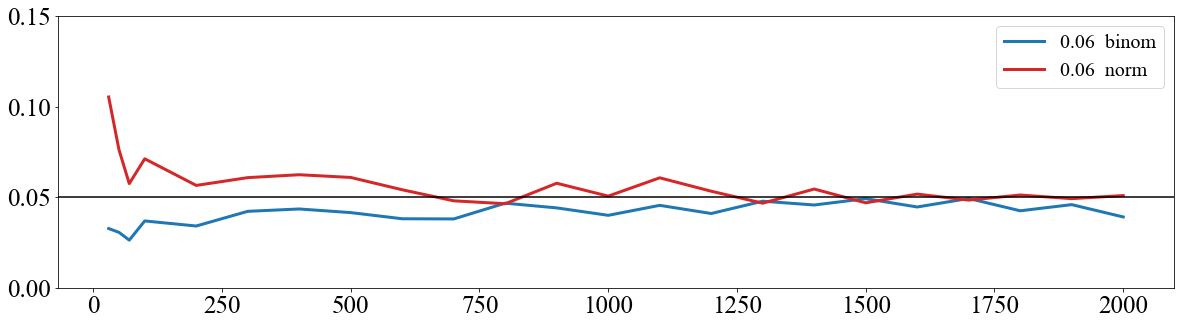

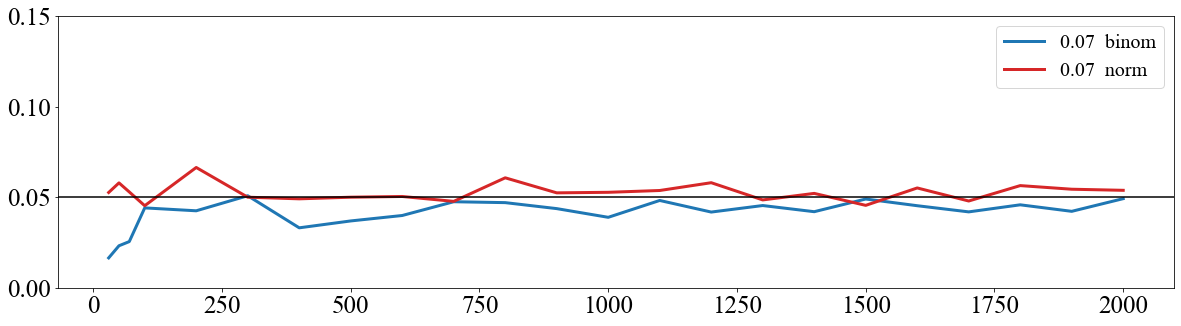

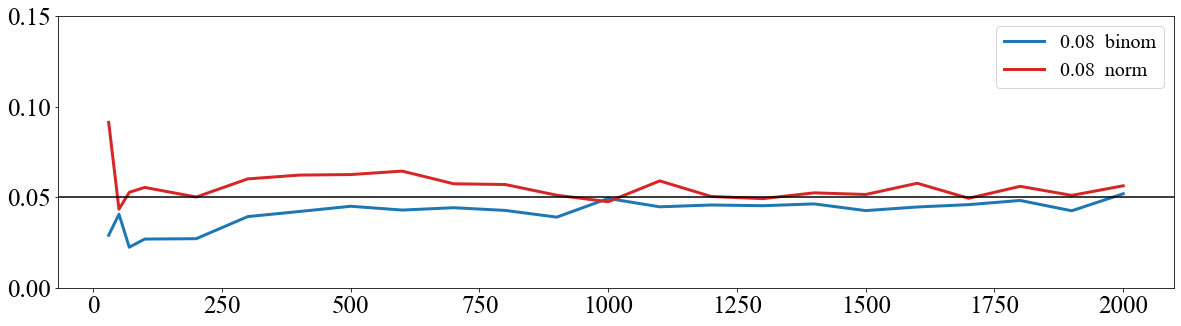

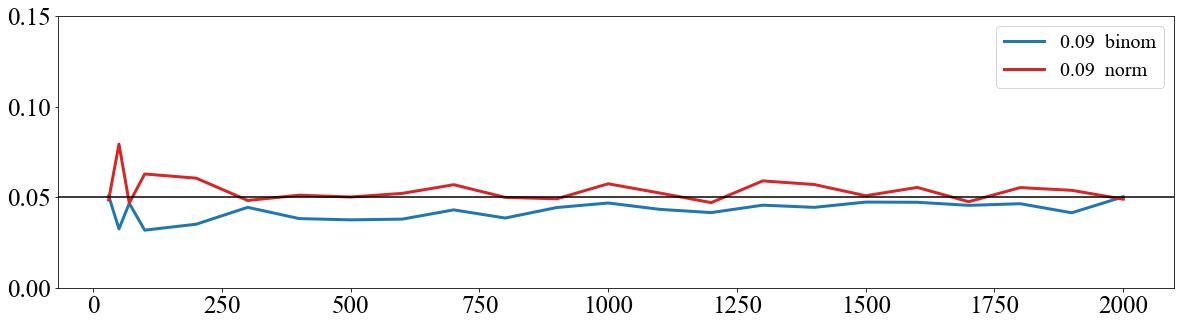

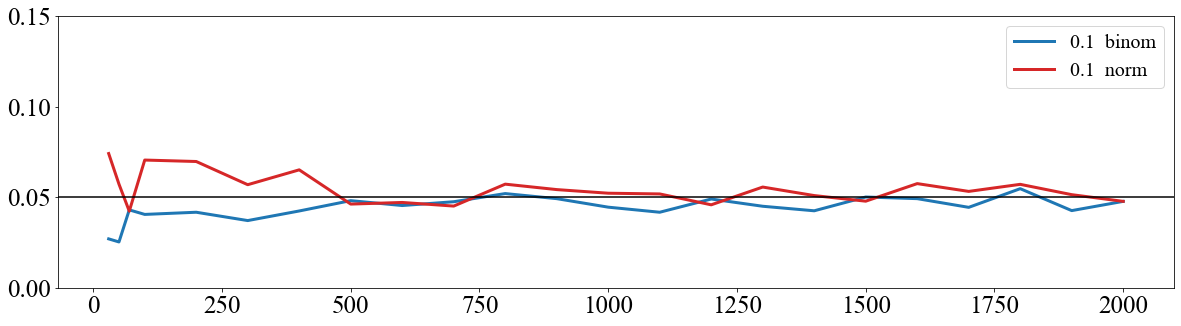

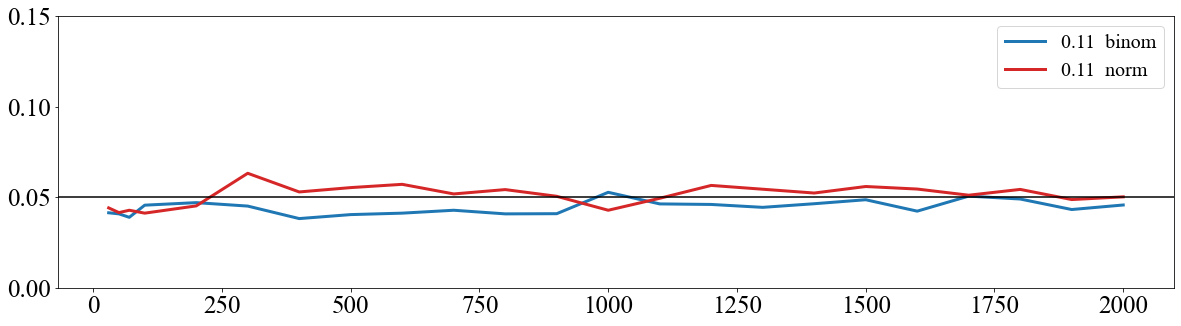

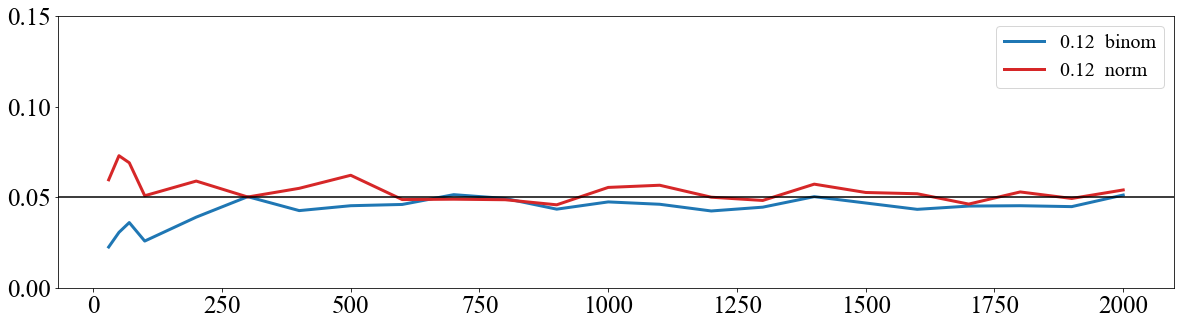

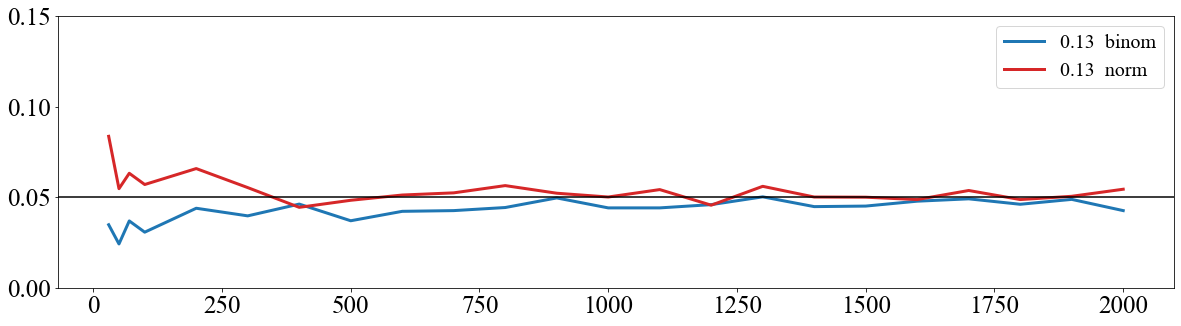

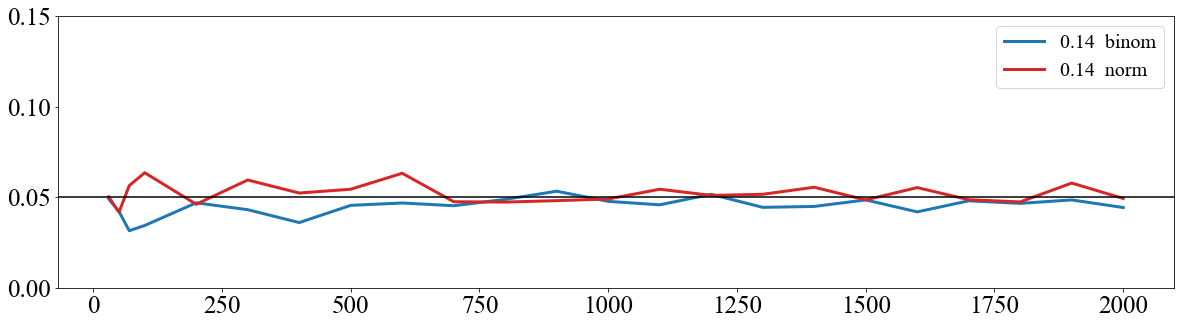

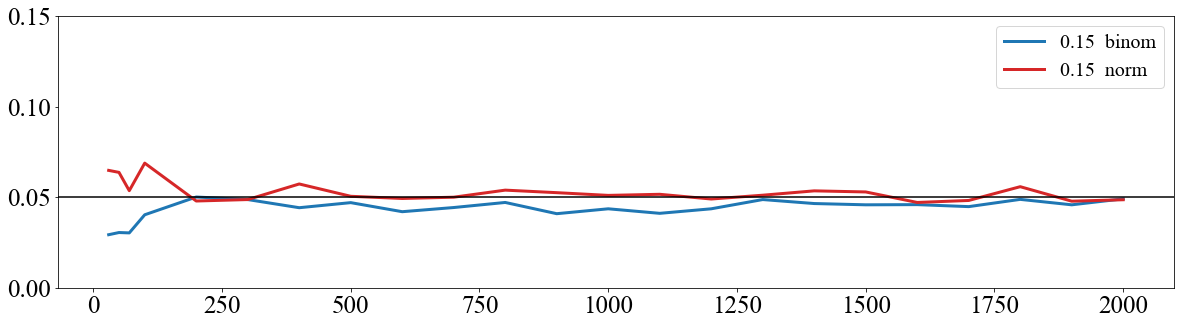

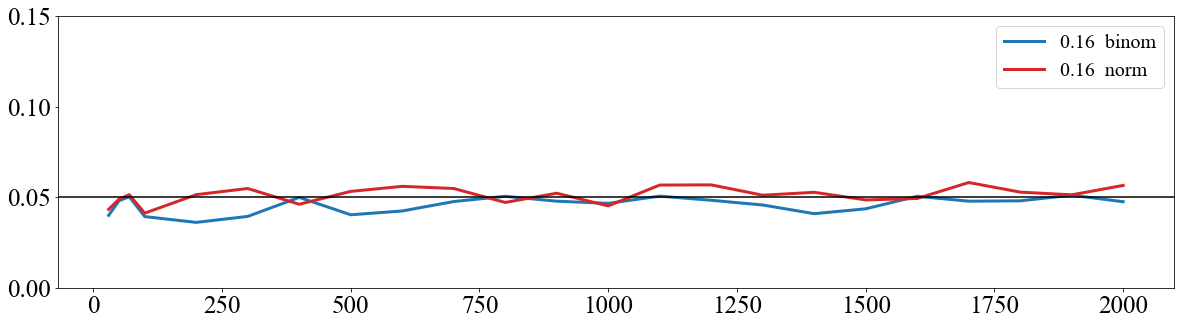

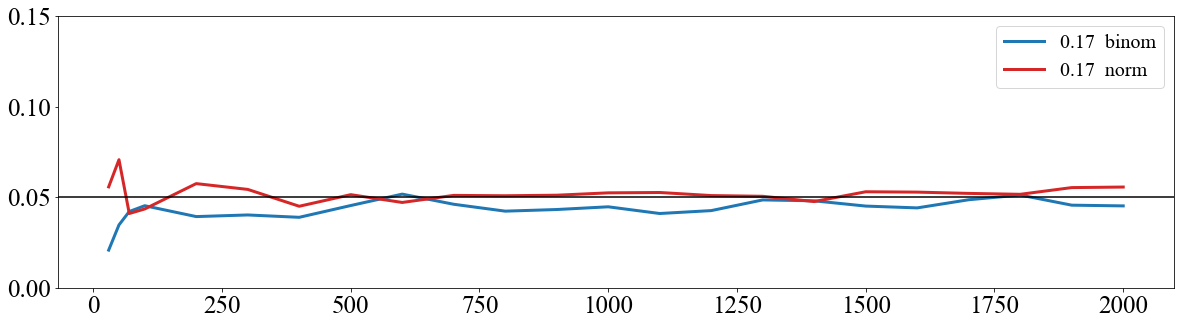

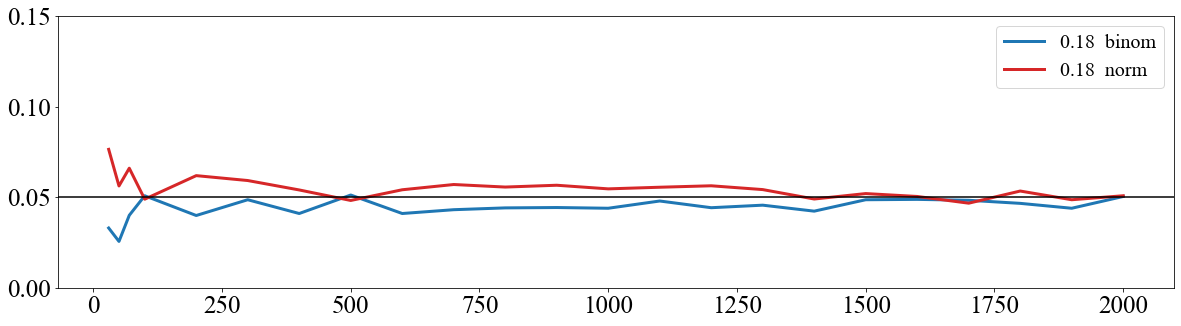

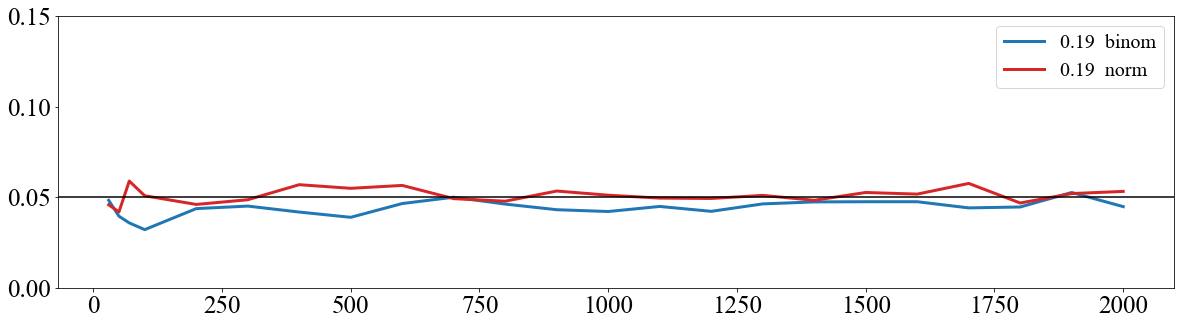

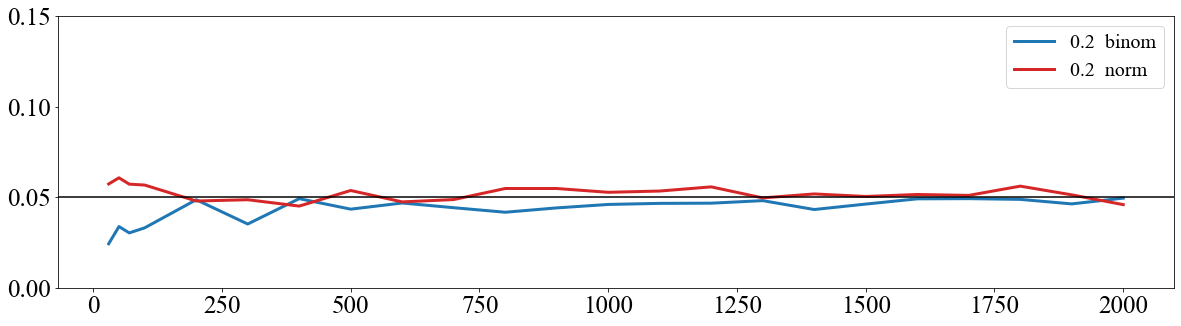

In [20]:
for c in df333.columns: 
    plt.figure(figsize = (20, 5))
    
    #plt.scatter(x = df111[c].index, y = df111[c], marker = ".") 
    plt.plot(df111[c].index, df111[c], "-", color = "tab:blue", label = c + "  binom", linewidth = 3) 
    
    #plt.scatter(x = df222[c].index, y = df222[c], marker = ".") 
    plt.plot(df222[c].index, df222[c], "-", color = "tab:red", label = c + "  norm", linewidth = 3) 
    
    #plt.scatter(x = df333[c].index, y = df333[c], marker = ".")
    #plt.plot(df333[c].index, df333[c], "-", color = "tab:red", label = c + "  arcsin") 
    
    plt.axhline(α, color = 'black') 
    #plt.axhline(α + 0.01, color = 'red', linestyle = '--') 
    #plt.axhline(α - 0.01, color = 'red', linestyle = '--') 
    
    plt.ylim([0, .15])
    plt.xticks(fontsize = 25) 
    plt.yticks([0, α, .1, .15], fontsize = 25)
    plt.legend(fontsize = 20) 
    plt.show()

### norm vs arcsin 

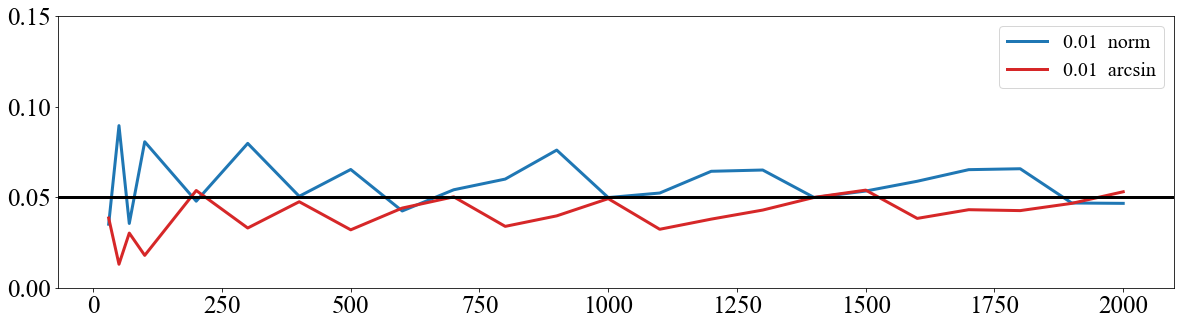

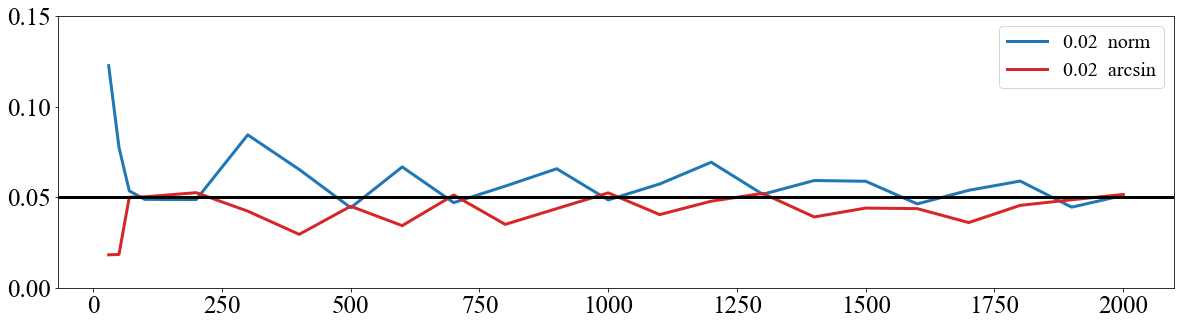

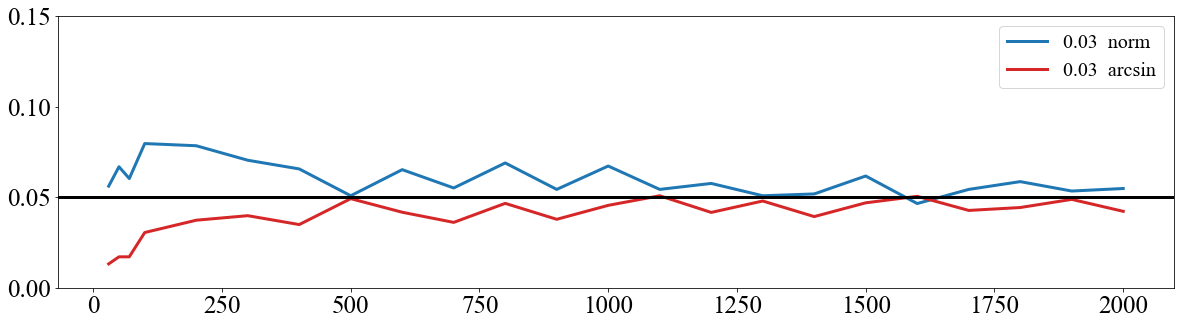

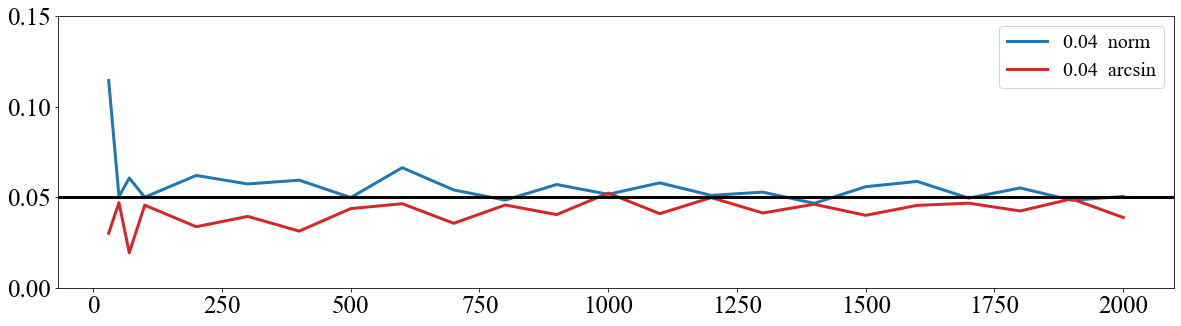

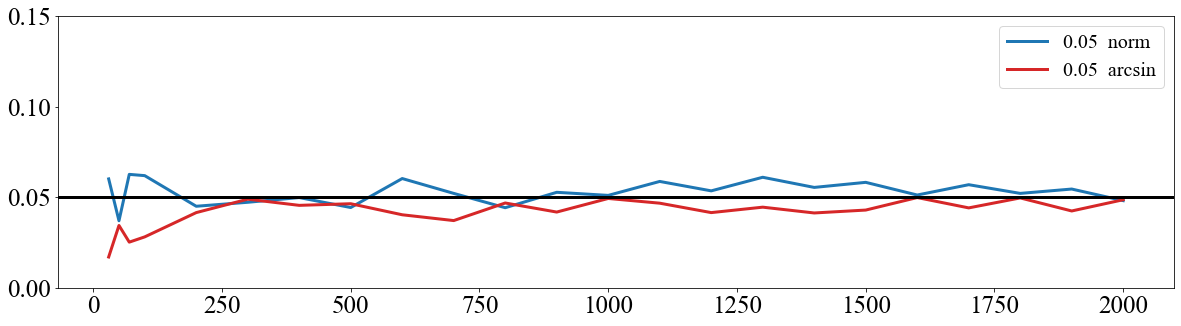

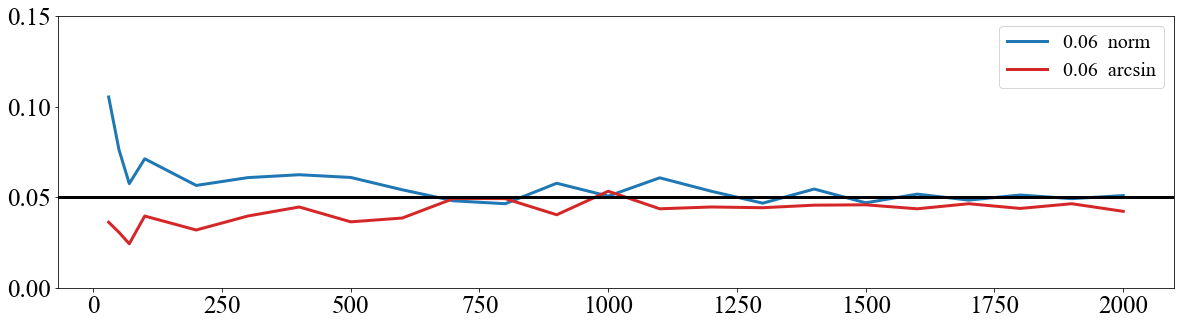

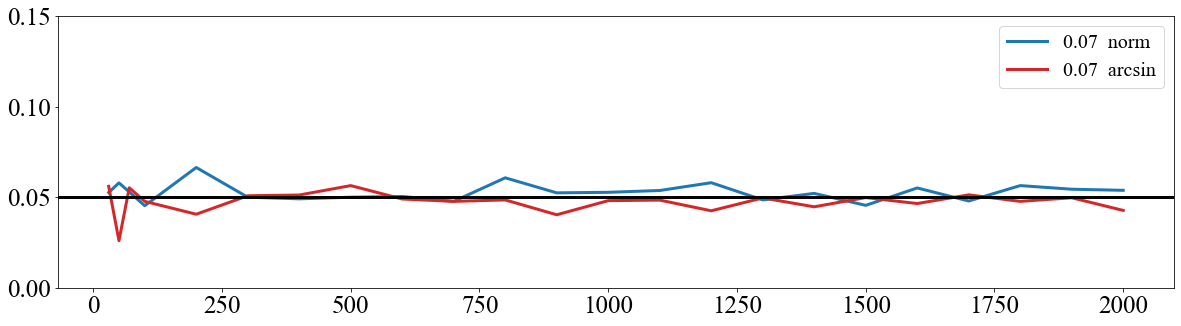

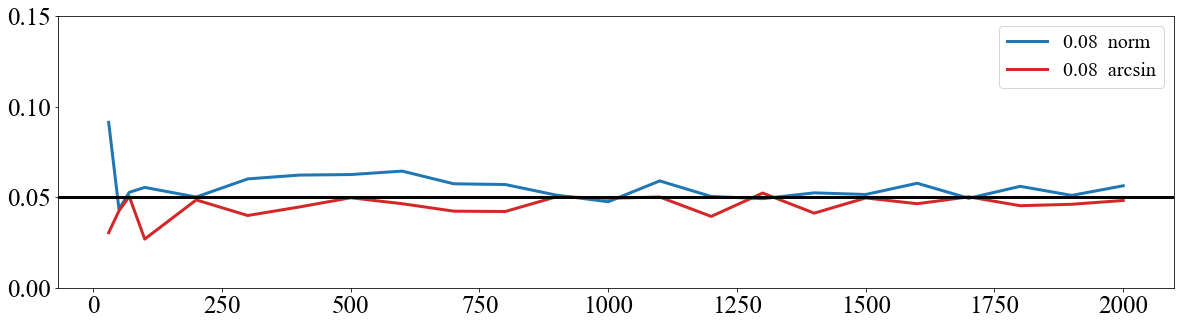

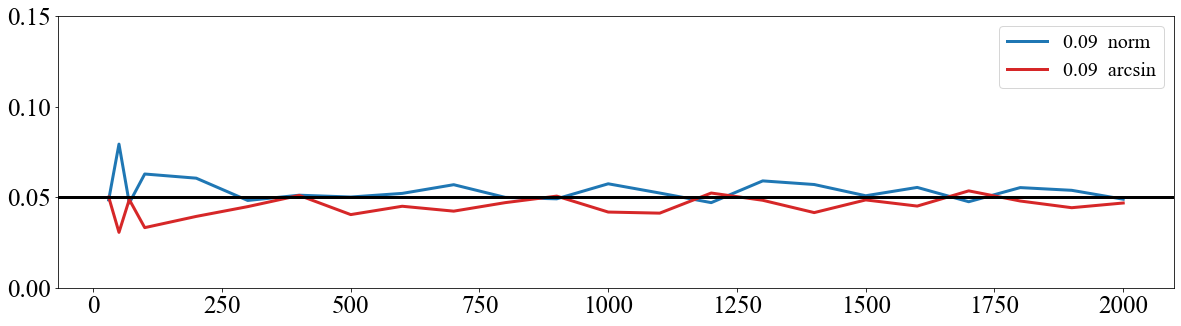

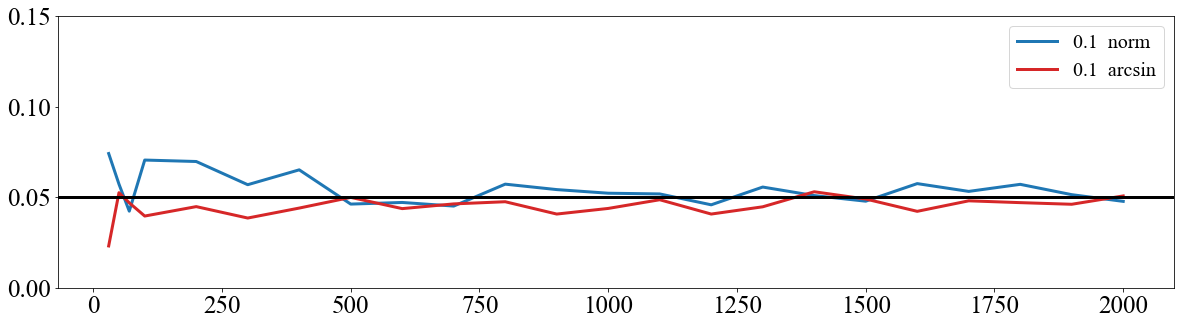

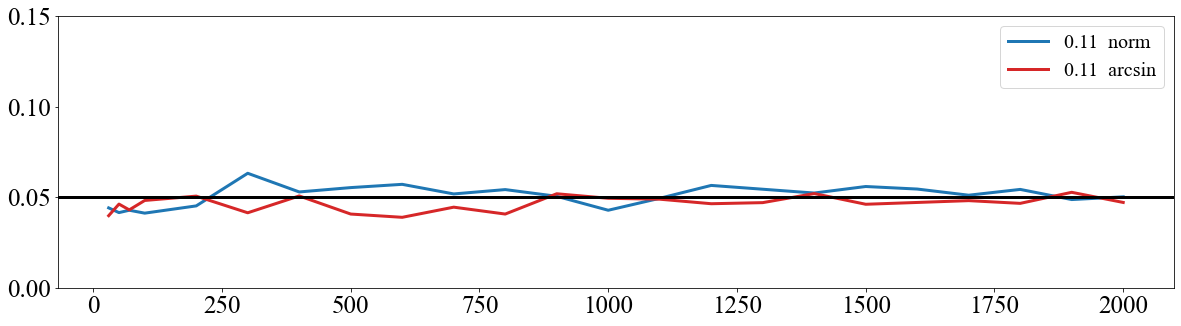

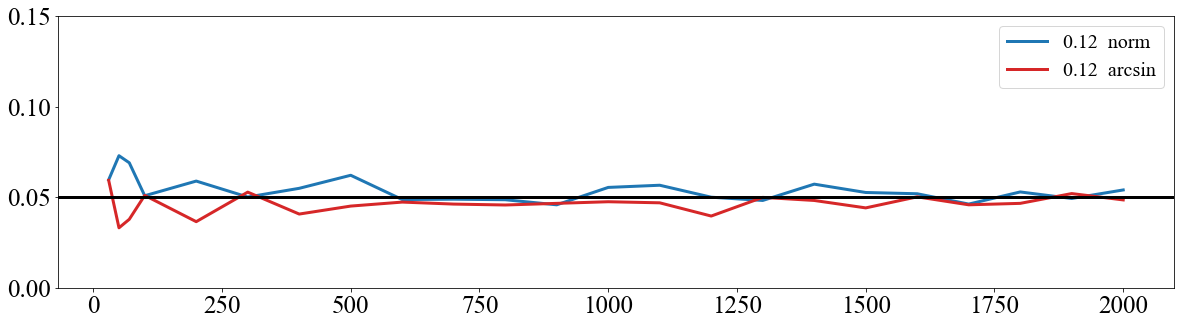

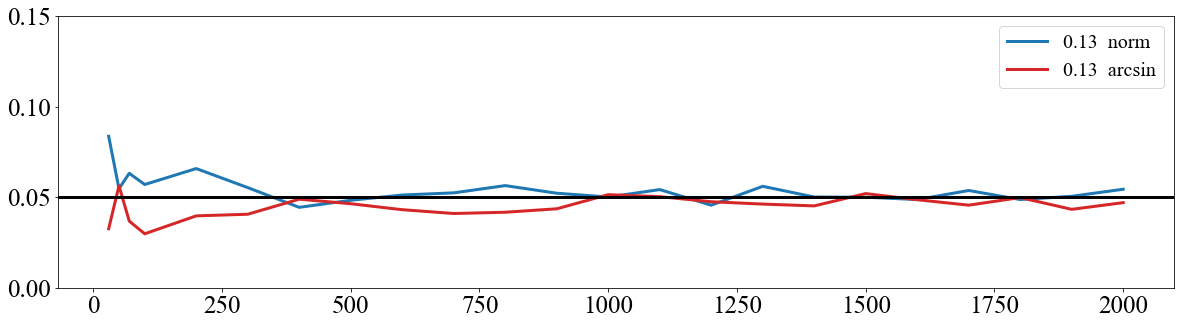

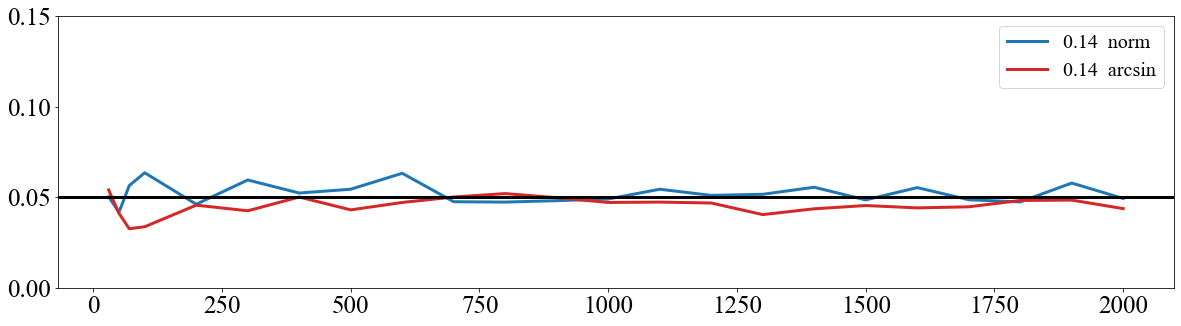

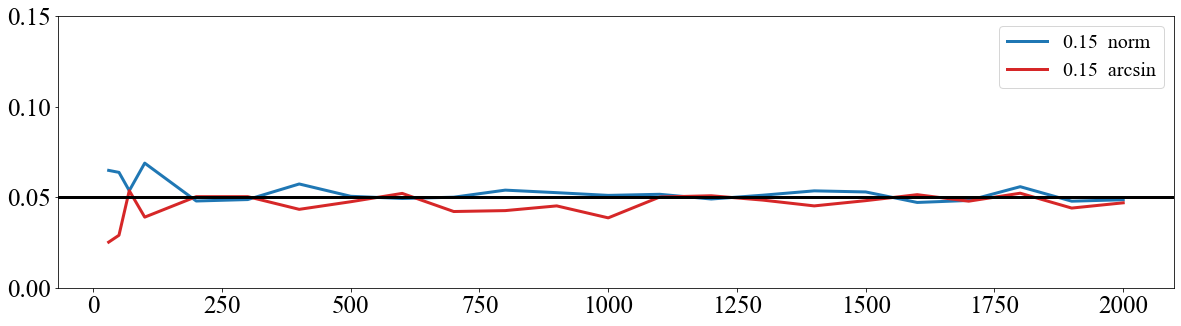

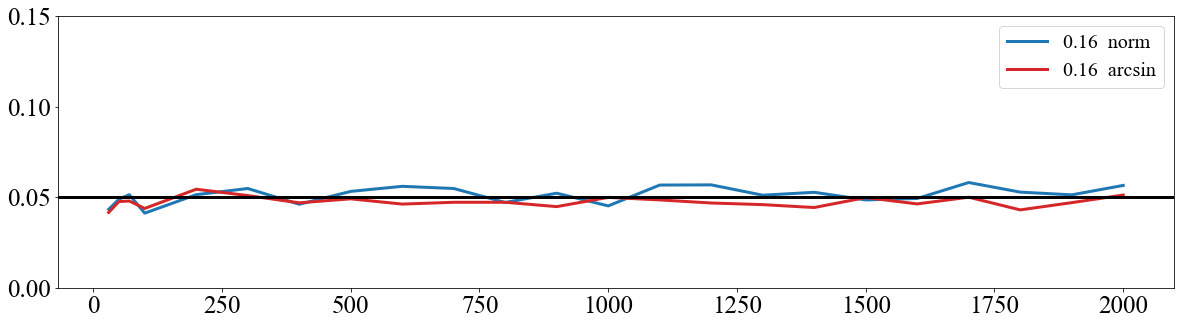

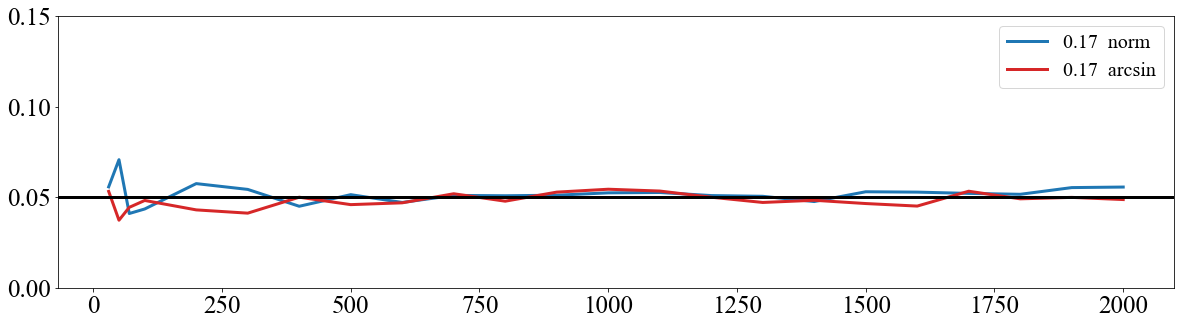

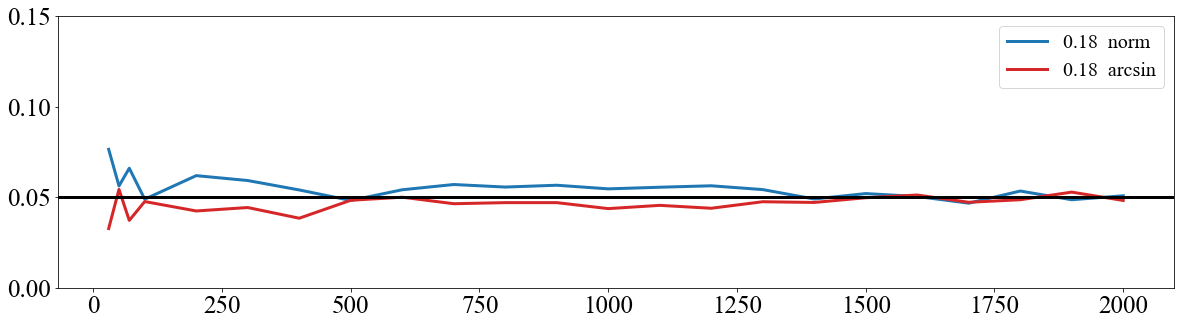

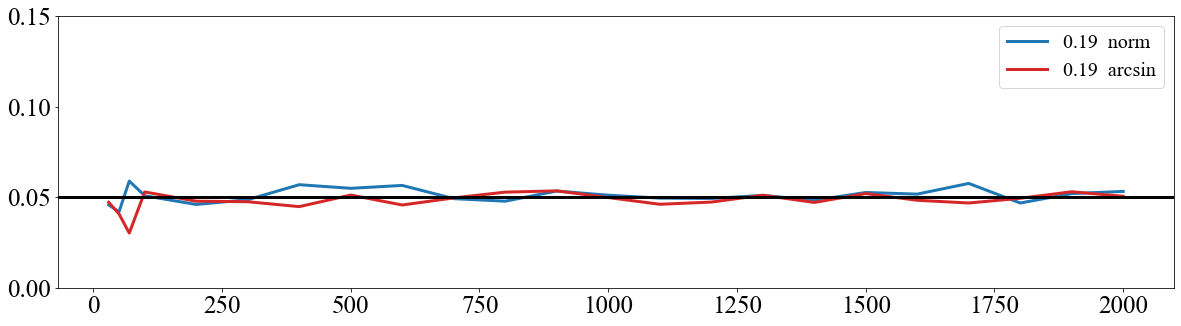

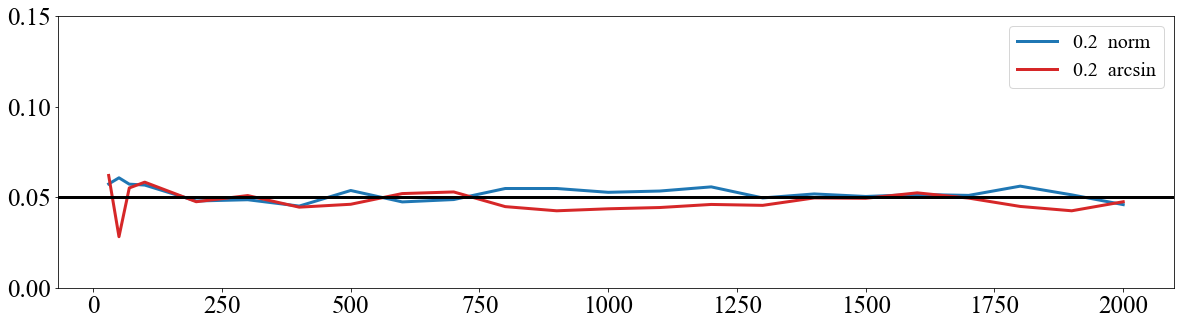

In [21]:
for c in df333.columns: 
    plt.figure(figsize = (20, 5))
    
    #plt.scatter(x = df111[c].index, y = df111[c], marker = ".") 
    #plt.plot(df111[c].index, df111[c], "-", label = c) 
    
    #plt.scatter(x = df222[c].index, y = df222[c], marker = ".") 
    plt.plot(df222[c].index, df222[c], "-", color = "tab:blue", label = c + "  norm", linewidth = 3) 
    
    #plt.scatter(x = df333[c].index, y = df333[c], marker = ".")
    plt.plot(df333[c].index, df333[c], "-", color = "tab:red", label = c + "  arcsin", linewidth = 3) 
    
    plt.axhline(α, color = 'black', linewidth = 3)  
    #plt.axhline(α + 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    #plt.axhline(α - 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    
    plt.ylim([0, .15])
    plt.xticks(fontsize = 25) 
    plt.yticks([0, α, .1, .15], fontsize = 25)
    plt.legend(fontsize = 20) 
    plt.show()

### binom vs arcsin 

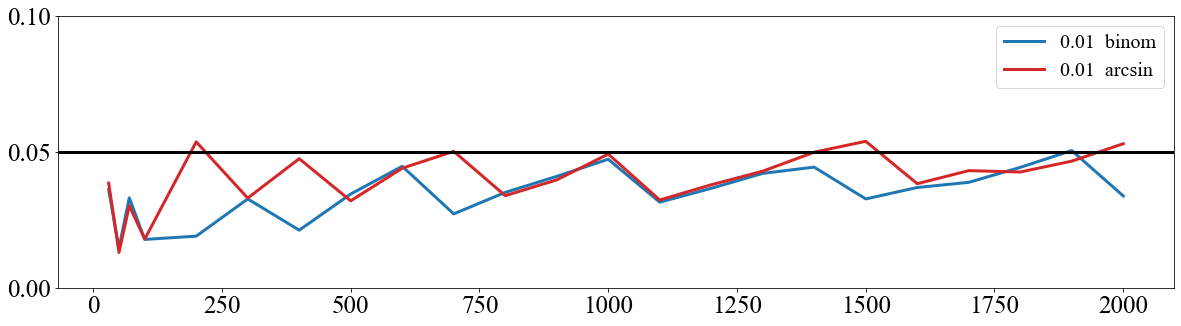

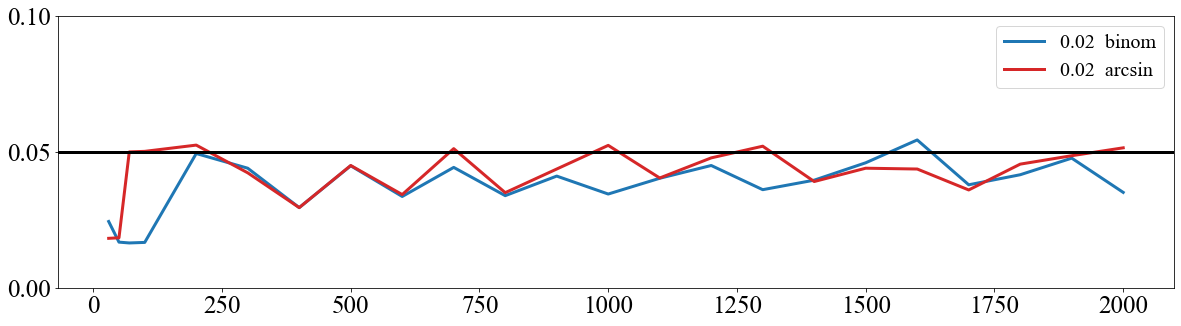

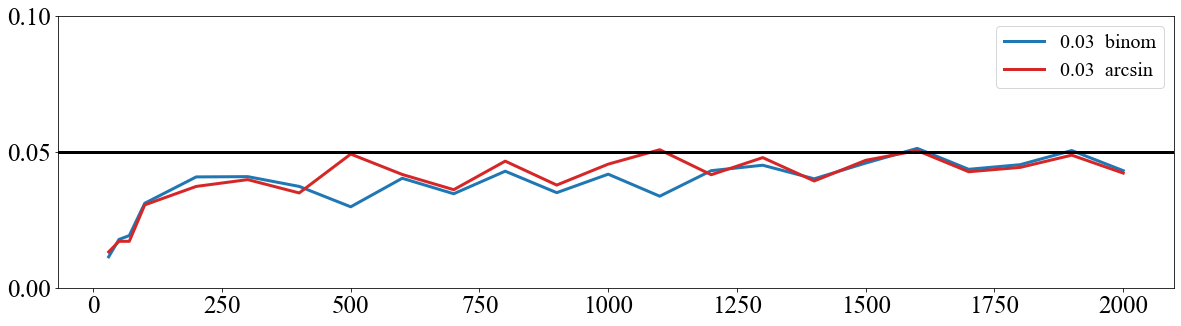

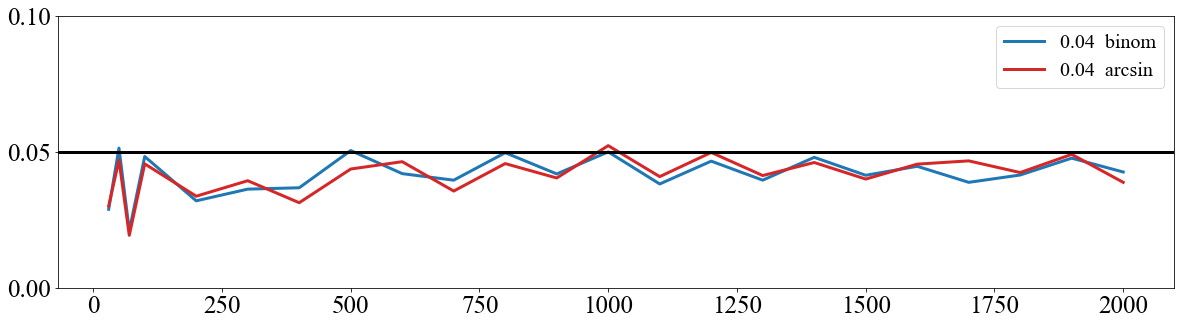

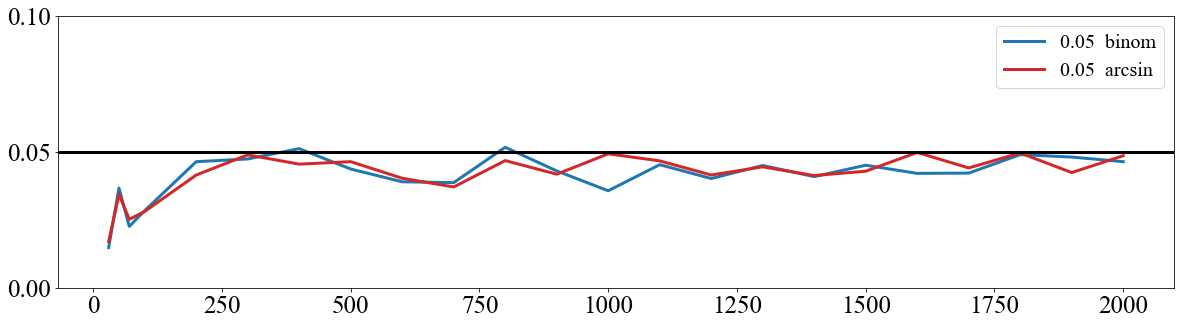

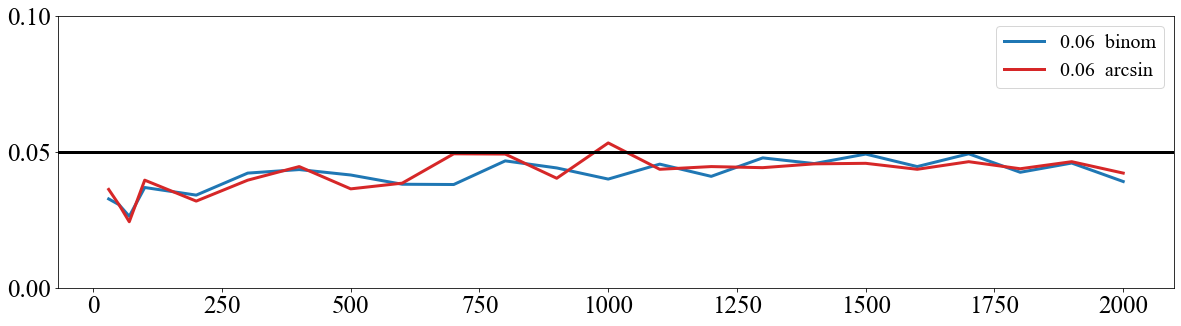

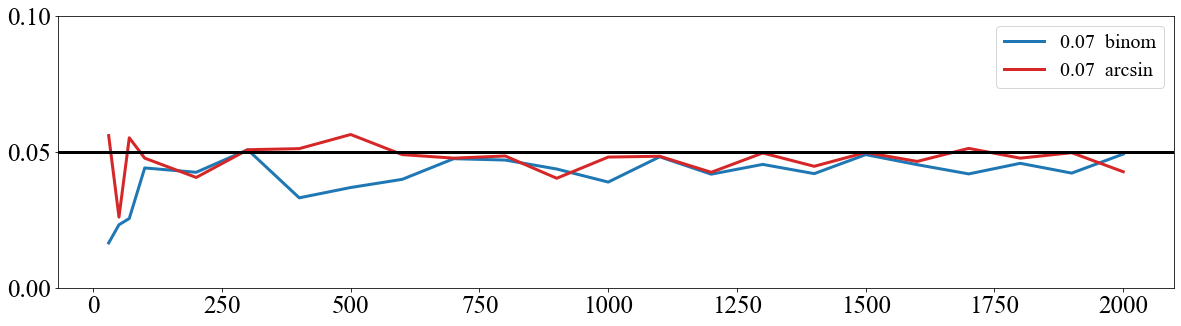

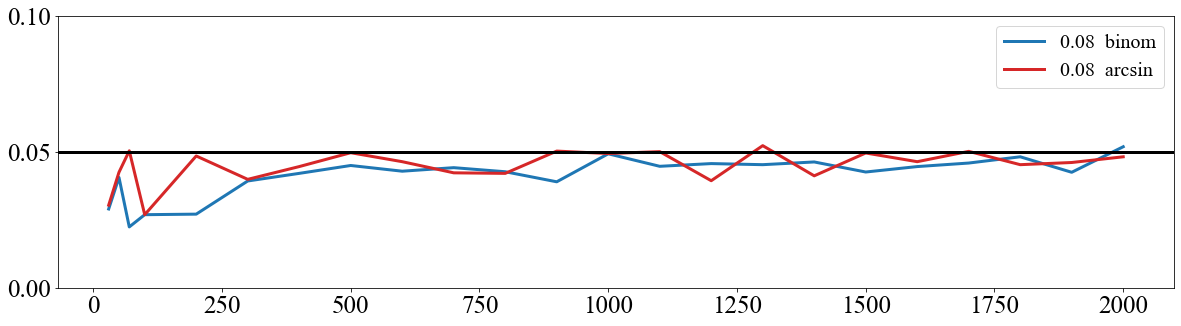

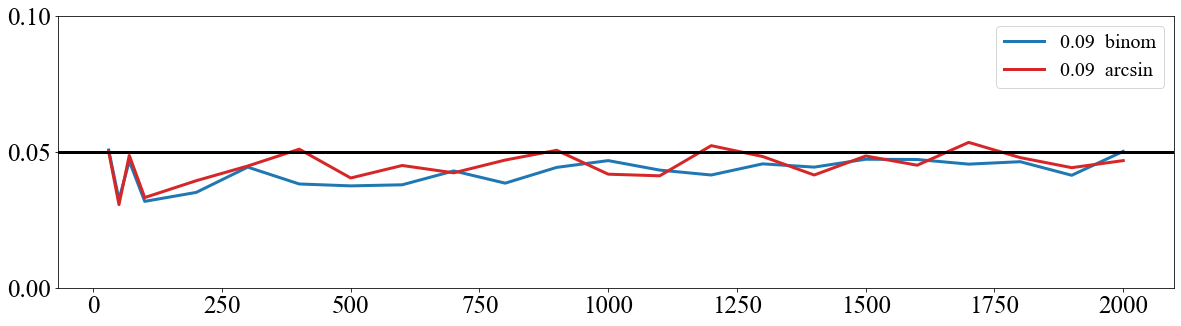

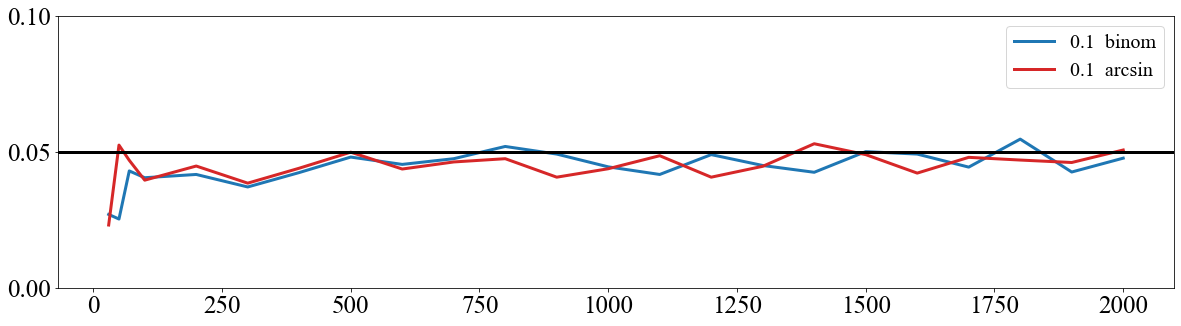

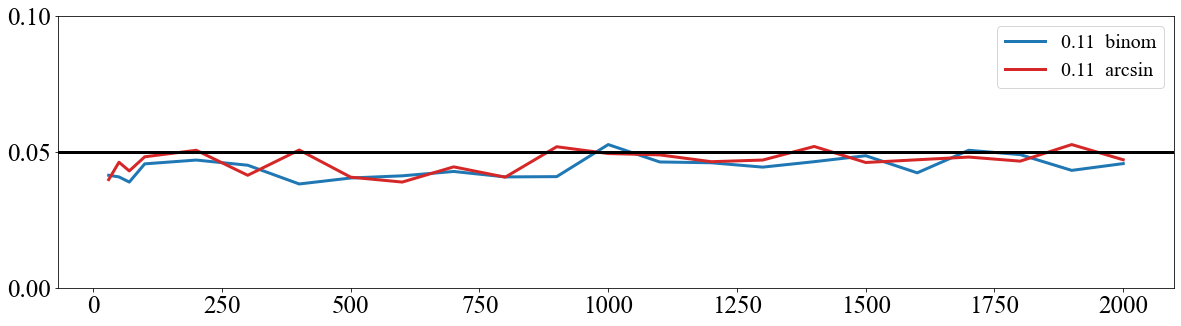

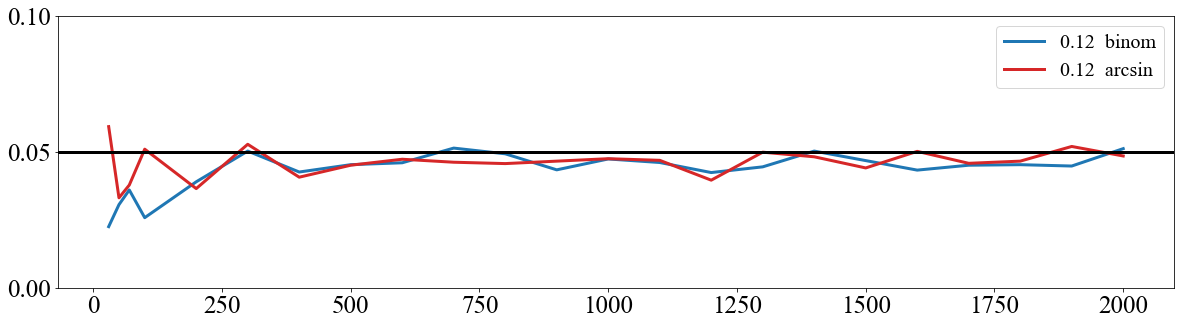

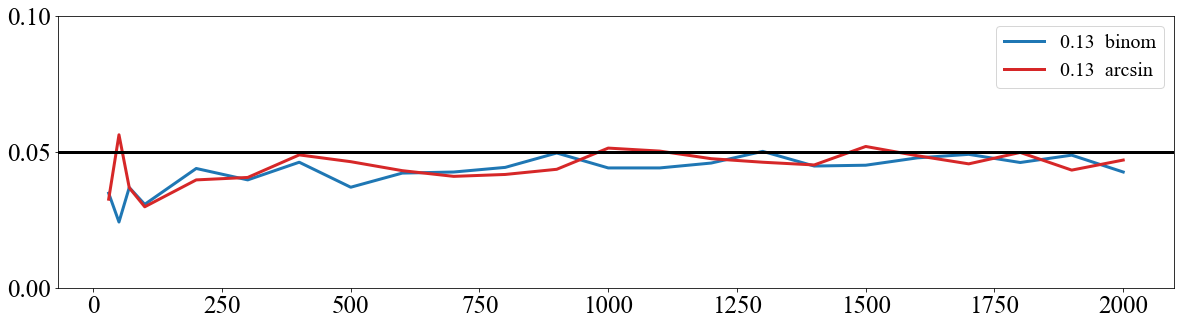

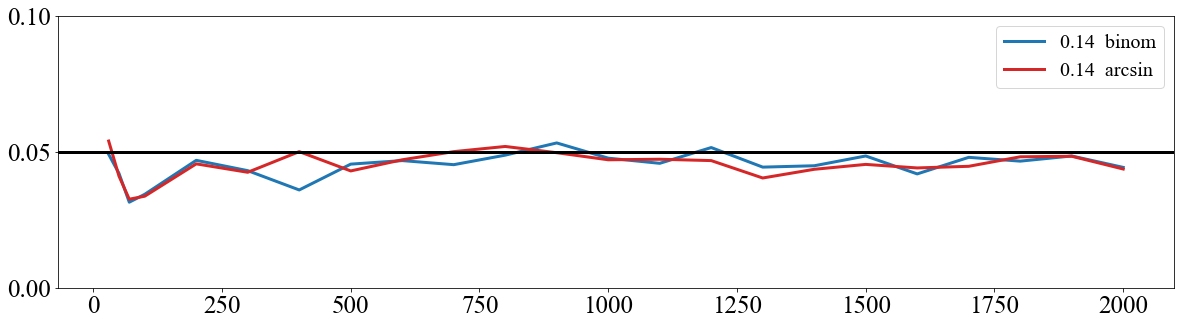

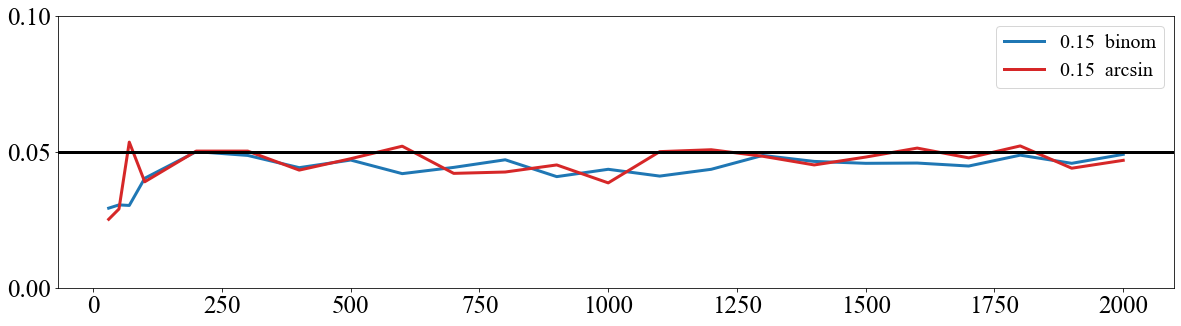

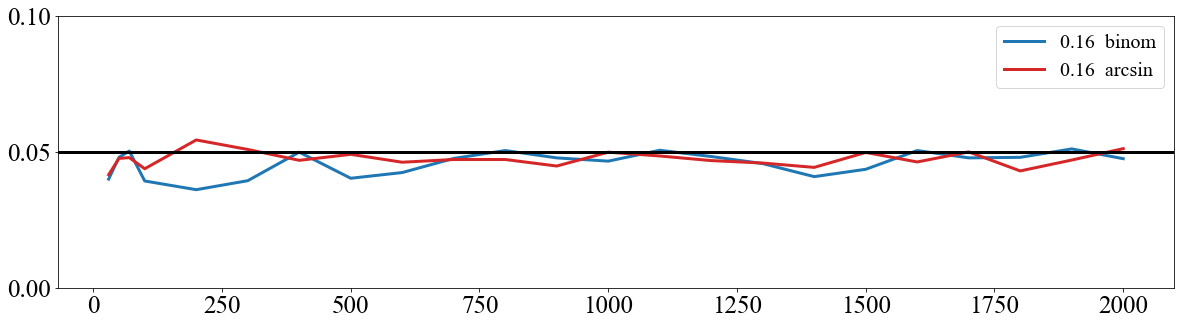

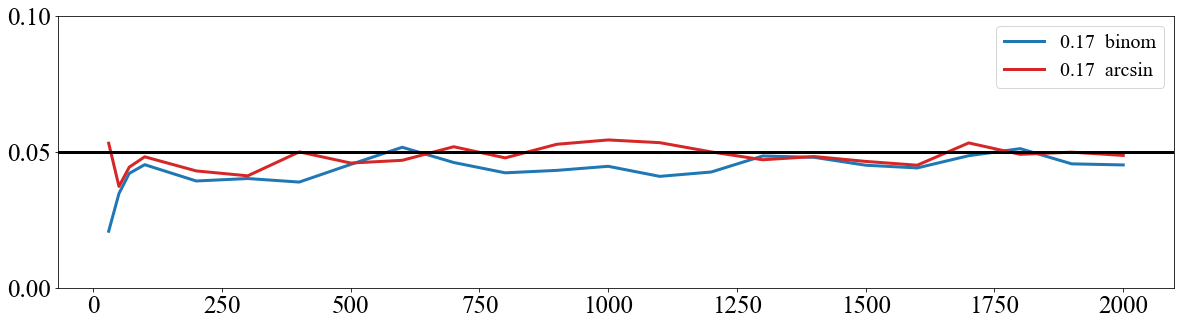

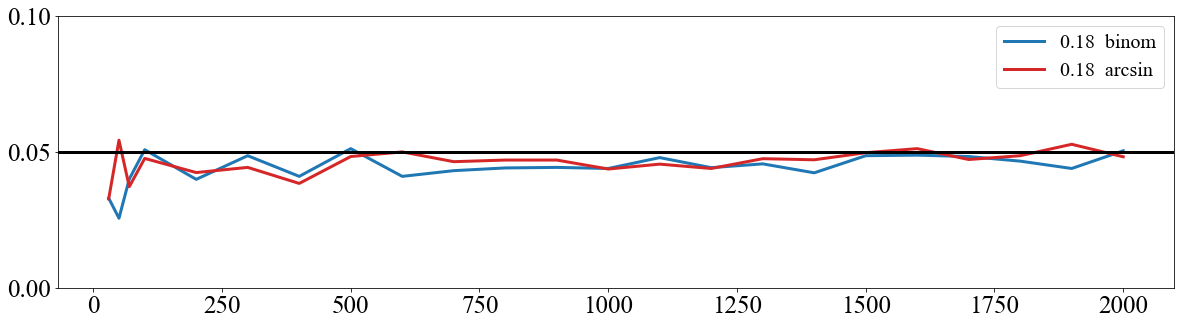

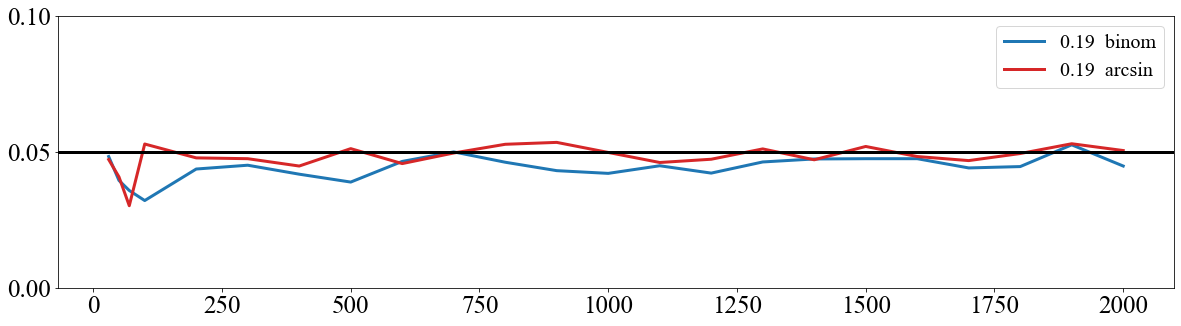

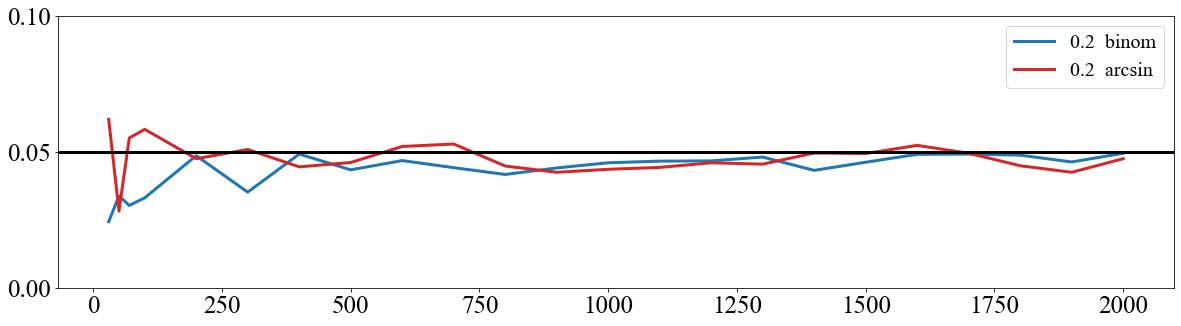

In [23]:
for c in df333.columns: 
    plt.figure(figsize = (20, 5)) 
    
    #plt.scatter(x = df111[c].index, y = df111[c], marker = ".") 
    #plt.plot(df111[c].index, df111[c], "-", label = c) 
    
    #plt.scatter(x = df111[c].index, y = df111[c], marker = ".") 
    plt.plot(df111[c].index, df111[c], "-", color = "tab:blue", label = c + "  binom", linewidth = 3) 
    
    #plt.scatter(x = df333[c].index, y = df333[c], marker = ".")
    plt.plot(df333[c].index, df333[c], "-", color = "tab:red", label = c + "  arcsin", linewidth = 3) 
    
    plt.axhline(α, color = 'black', linewidth = 3)  
    #plt.axhline(α + 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    #plt.axhline(α - 0.01, color = 'red', linestyle = '--', linewidth = 2) 
    
    plt.ylim([0, .1])
    plt.xticks(fontsize = 25) 
    plt.yticks([0, α, .1], fontsize = 25)
    plt.legend(fontsize = 20) 
    plt.show()